In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,accuracy_score,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
df = pd.read_csv("Transport.csv")

In [3]:
df.head()

,Age,Gender,Engineer,MBA,Work Exp,Salary,Distance,license,Transport
0,28,Male,0,0,4,14.3,3.2,0,Public Transport
1,23,Female,1,0,4,8.3,3.3,0,Public Transport
2,29,Male,1,0,7,13.4,4.1,0,Public Transport
3,28,Female,1,1,5,13.4,4.5,0,Public Transport
4,27,Male,1,0,4,13.4,4.6,0,Public Transport


In [4]:
df_logit = df.copy()

In [5]:
df_rf = df.copy()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444 entries, 0 to 443
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        444 non-null    int64  
 1   Gender     444 non-null    object 
 2   Engineer   444 non-null    int64  
 3   MBA        444 non-null    int64  
 4   Work Exp   444 non-null    int64  
 5   Salary     444 non-null    float64
 6   Distance   444 non-null    float64
 7   license    444 non-null    int64  
 8   Transport  444 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 31.3+ KB


In [7]:
df.isnull().sum()

Age          0
Gender       0
Engineer     0
MBA          0
Work Exp     0
Salary       0
Distance     0
license      0
Transport    0
dtype: int64

In [8]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,444.0,NaN,NaN,NaN,27.747748,4.41671,18.0,25.0,27.0,30.0,43.0
Gender,444,2,Male,316,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Engineer,444.0,NaN,NaN,NaN,0.754505,0.430866,0.0,1.0,1.0,1.0,1.0
MBA,444.0,NaN,NaN,NaN,0.252252,0.434795,0.0,0.0,0.0,1.0,1.0
Work Exp,444.0,NaN,NaN,NaN,6.29955,5.112098,0.0,3.0,5.0,8.0,24.0
Salary,444.0,NaN,NaN,NaN,16.238739,10.453851,6.5,9.8,13.6,15.725,57.0
Distance,444.0,NaN,NaN,NaN,11.323198,3.606149,3.2,8.8,11.0,13.425,23.4
license,444.0,NaN,NaN,NaN,0.234234,0.423997,0.0,0.0,0.0,0.0,1.0
Transport,444,2,Public Transport,300,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df.duplicated().sum()

0

In [10]:
df.columns

Index(['Age', 'Gender', 'Engineer', 'MBA', 'Work Exp', 'Salary', 'Distance',
       'license', 'Transport'],
      dtype='object')

In [11]:
for column in df[['Gender','Engineer', 'MBA',
'license', 'Transport']]:
    print(column.upper(),': ',df[column].nunique())
    print(df[column].value_counts().sort_values())
    print('\n')

GENDER :  2
Female    128
Male      316
Name: Gender, dtype: int64


ENGINEER :  2
0    109
1    335
Name: Engineer, dtype: int64


MBA :  2
1    112
0    332
Name: MBA, dtype: int64


LICENSE :  2
1    104
0    340
Name: license, dtype: int64


TRANSPORT :  2
Private Transport    144
Public Transport     300
Name: Transport, dtype: int64




In [12]:
df['Age'].value_counts()

26    63
27    49
28    46
24    46
25    37
30    34
29    26
23    24
31    16
22    15
32    13
33    11
34    11
38     9
21     8
39     7
40     7
36     6
20     5
37     4
35     2
18     2
19     1
42     1
43     1
Name: Age, dtype: int64

In [13]:
df['Work Exp'].value_counts()

4     54
2     47
3     46
6     46
5     42
0     29
7     28
8     28
1     22
9     21
10    14
11    11
19    10
14     8
21     6
20     6
16     5
12     5
18     5
13     3
22     3
17     2
15     2
24     1
Name: Work Exp, dtype: int64

In [14]:
df['Salary'].value_counts()

14.6    22
8.5     13
13.6    12
12.8    12
14.9    11
        ..
16.7     1
22.7     1
29.9     1
18.9     1
50.0     1
Name: Salary, Length: 122, dtype: int64

In [15]:
df['Salary'].nunique()

122

In [16]:
df['Distance'].value_counts()

12.2    12
8.1     11
9.0      9
11.7     8
9.4      7
        ..
14.5     1
15.4     1
16.2     1
16.5     1
23.4     1
Name: Distance, Length: 137, dtype: int64

In [17]:
df['Distance'].nunique()

137

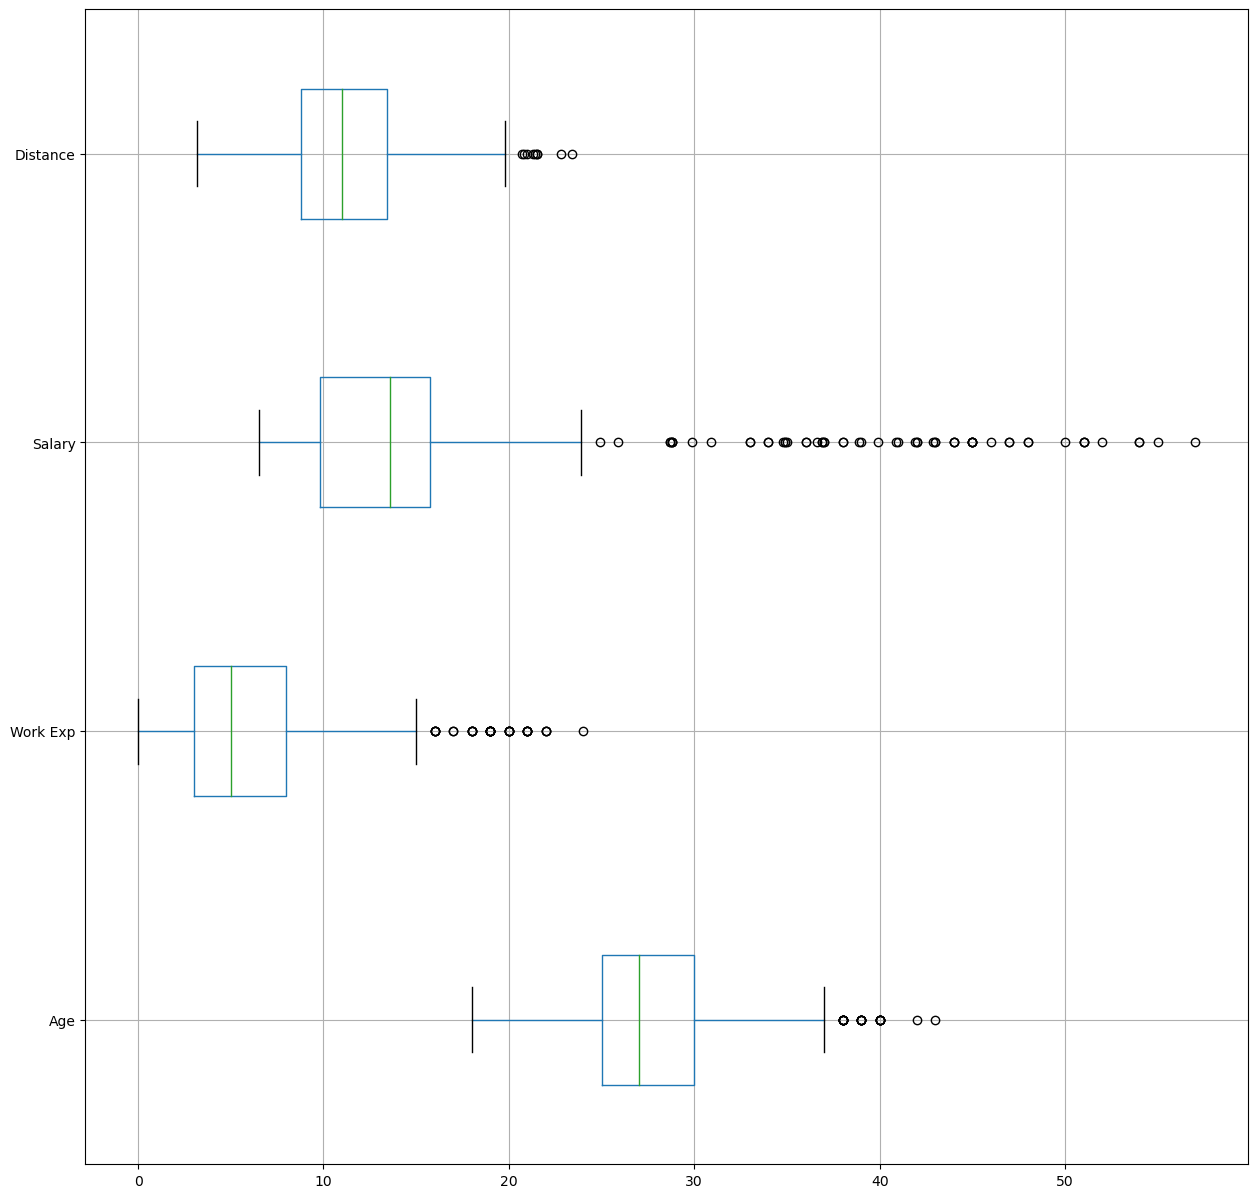

In [18]:
plt.figure(figsize=(15,15))
df[['Age','Work Exp', 'Salary', 'Distance',
        'Transport']].boxplot(vert=0)
plt.show()

In [19]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
pd.DataFrame((((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()/df.shape[0]*100).round(2),columns=['Outliers %'])

,Outliers %
Age,5.63
Distance,2.03
Engineer,24.55
Gender,0.00
MBA,0.00
Salary,13.29
Transport,0.00
Work Exp,8.56
license,23.42


Categories present in Gender-


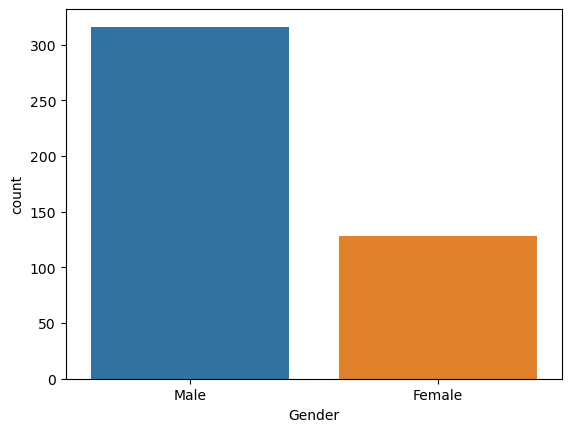

Categories present in Transport-


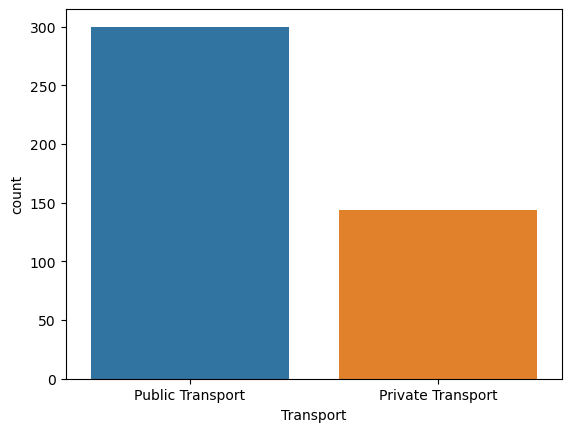

In [20]:
for feature in df.columns: 
    if df[feature].dtype == 'object':  
        print('Categories present in {}-'.format(feature))
        sns.countplot(df[feature])
        plt.show()

Categories present in Age-


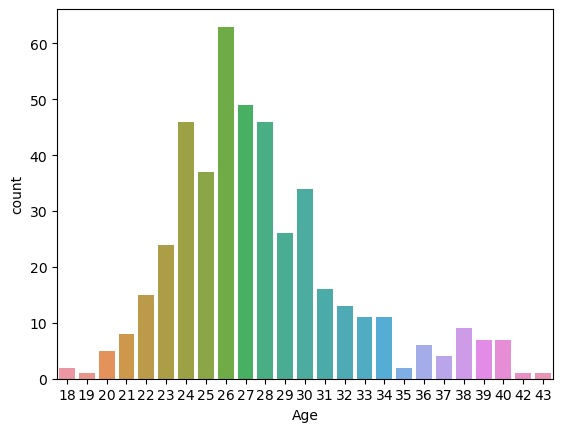

Categories present in Engineer-


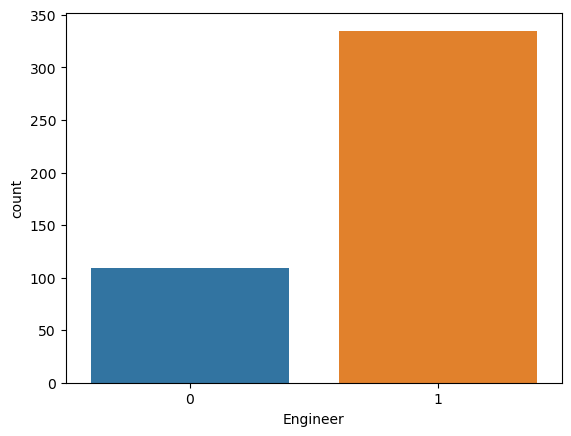

Categories present in MBA-


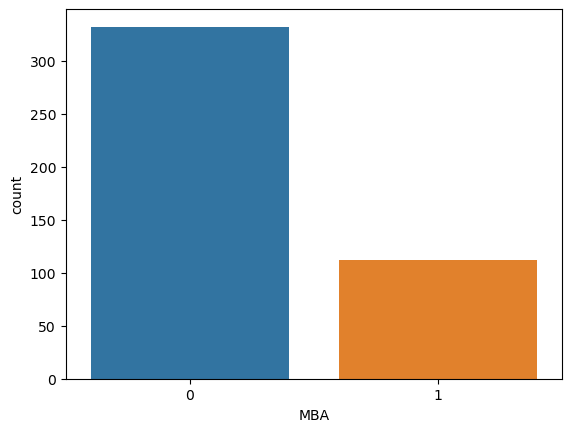

Categories present in Work Exp-


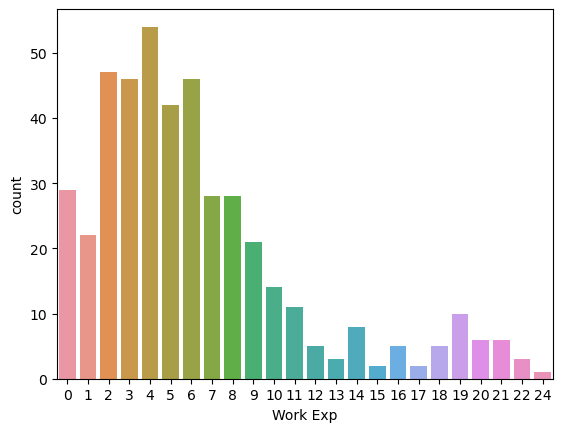

Categories present in license-


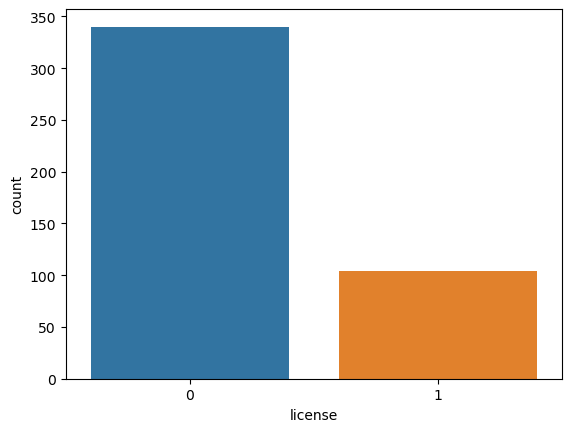

In [21]:
for feature in df.columns: 
    if df[feature].dtype == 'int64':  
        print('Categories present in {}-'.format(feature))
        sns.countplot(df[feature])
        plt.show()

Categories present in Salary-


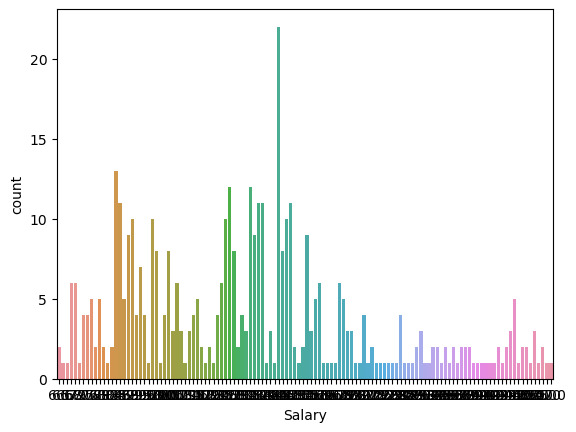

Categories present in Distance-


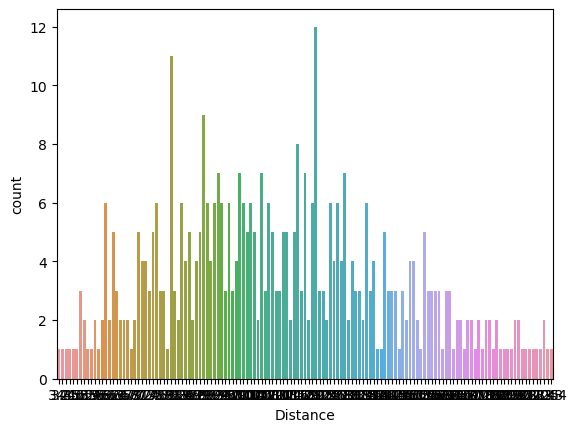

In [22]:
for feature in df.columns: 
    if df[feature].dtype == 'float64':  
        print('Categories present in {}-'.format(feature))
        sns.countplot(df[feature])
        plt.show()

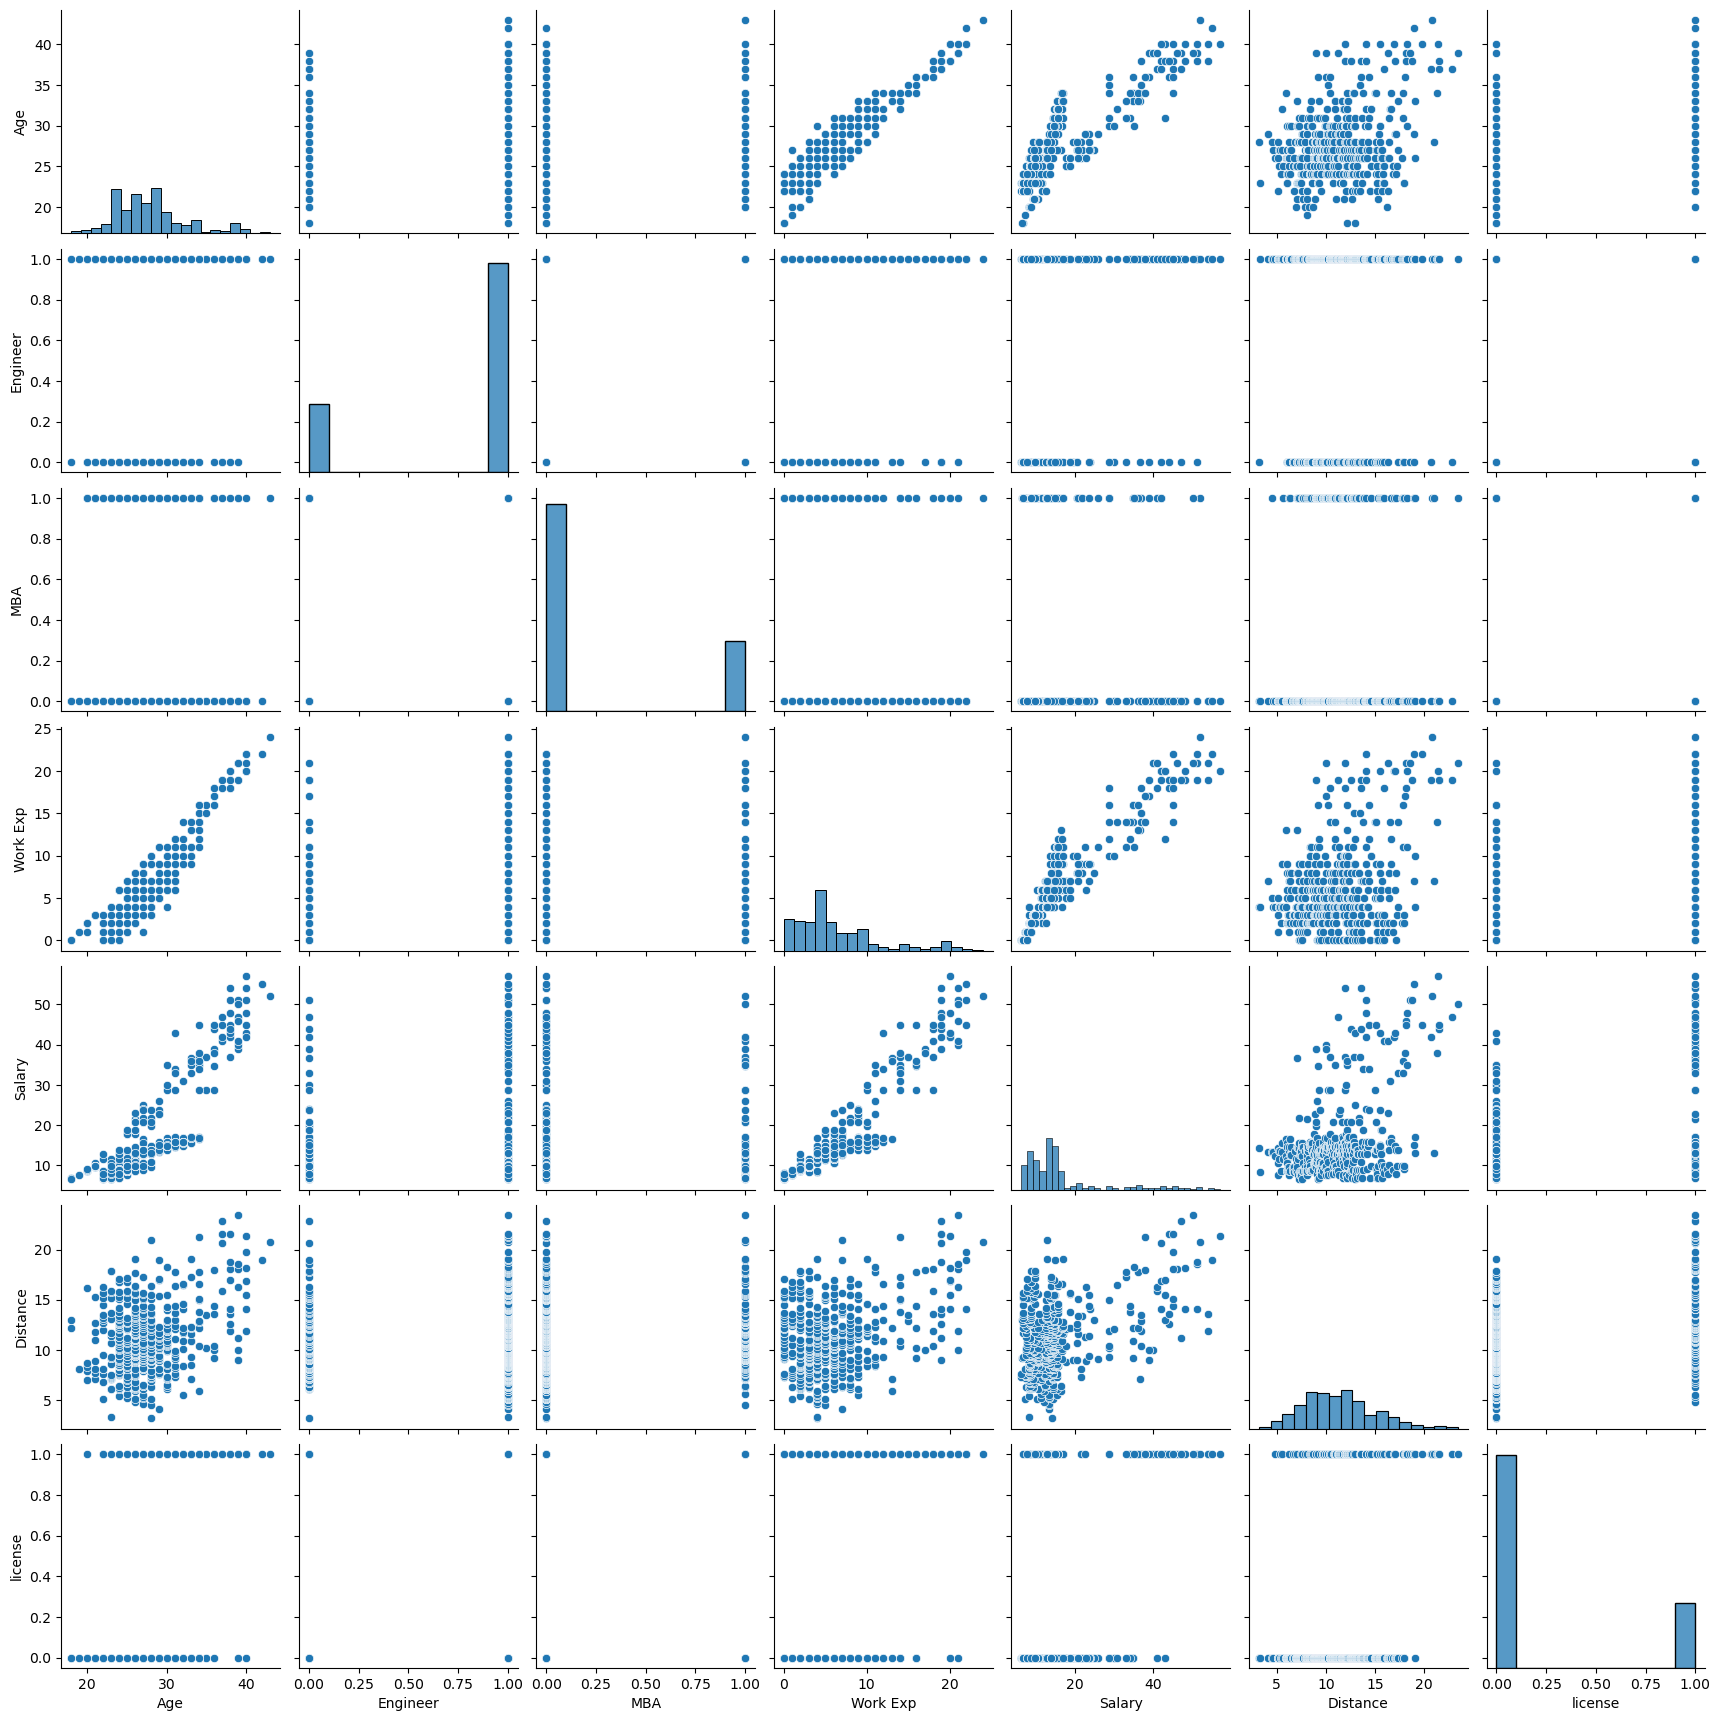

In [23]:
sns.pairplot(df)

<AxesSubplot:>

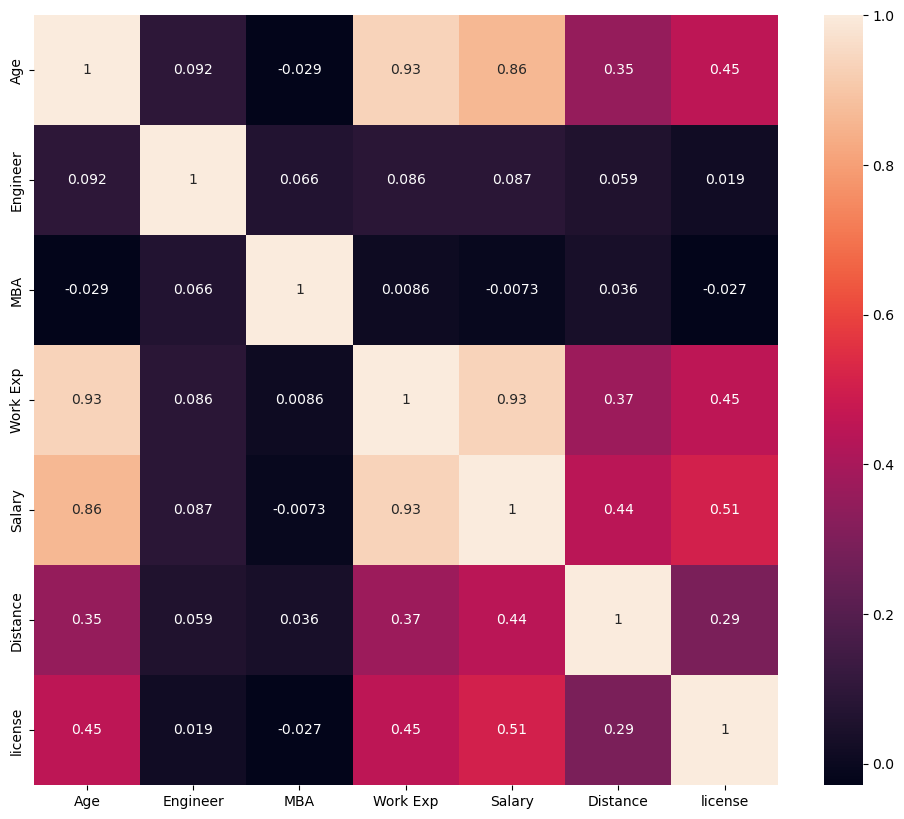

In [24]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:xlabel='license', ylabel='count'>

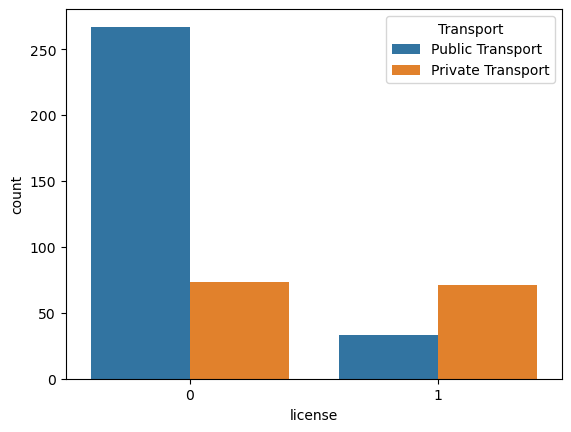

In [25]:
sns.countplot(x= df['license'],hue = df['Transport'])

<AxesSubplot:xlabel='MBA', ylabel='count'>

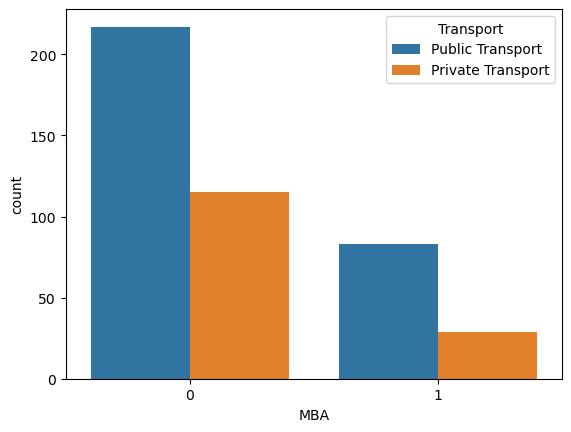

In [26]:
sns.countplot(x= df['MBA'],hue = df['Transport'])

<AxesSubplot:xlabel='Engineer', ylabel='count'>

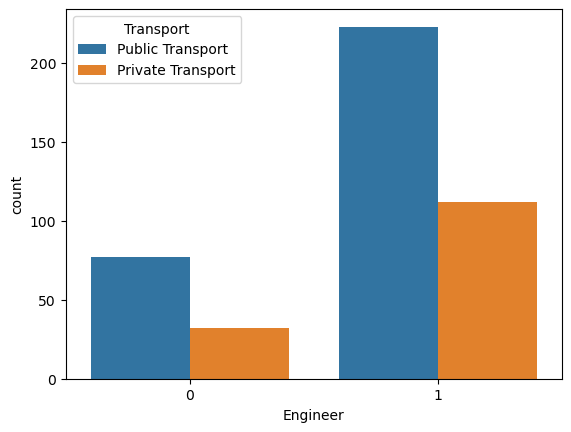

In [27]:
sns.countplot(x= df['Engineer'],hue = df['Transport'])

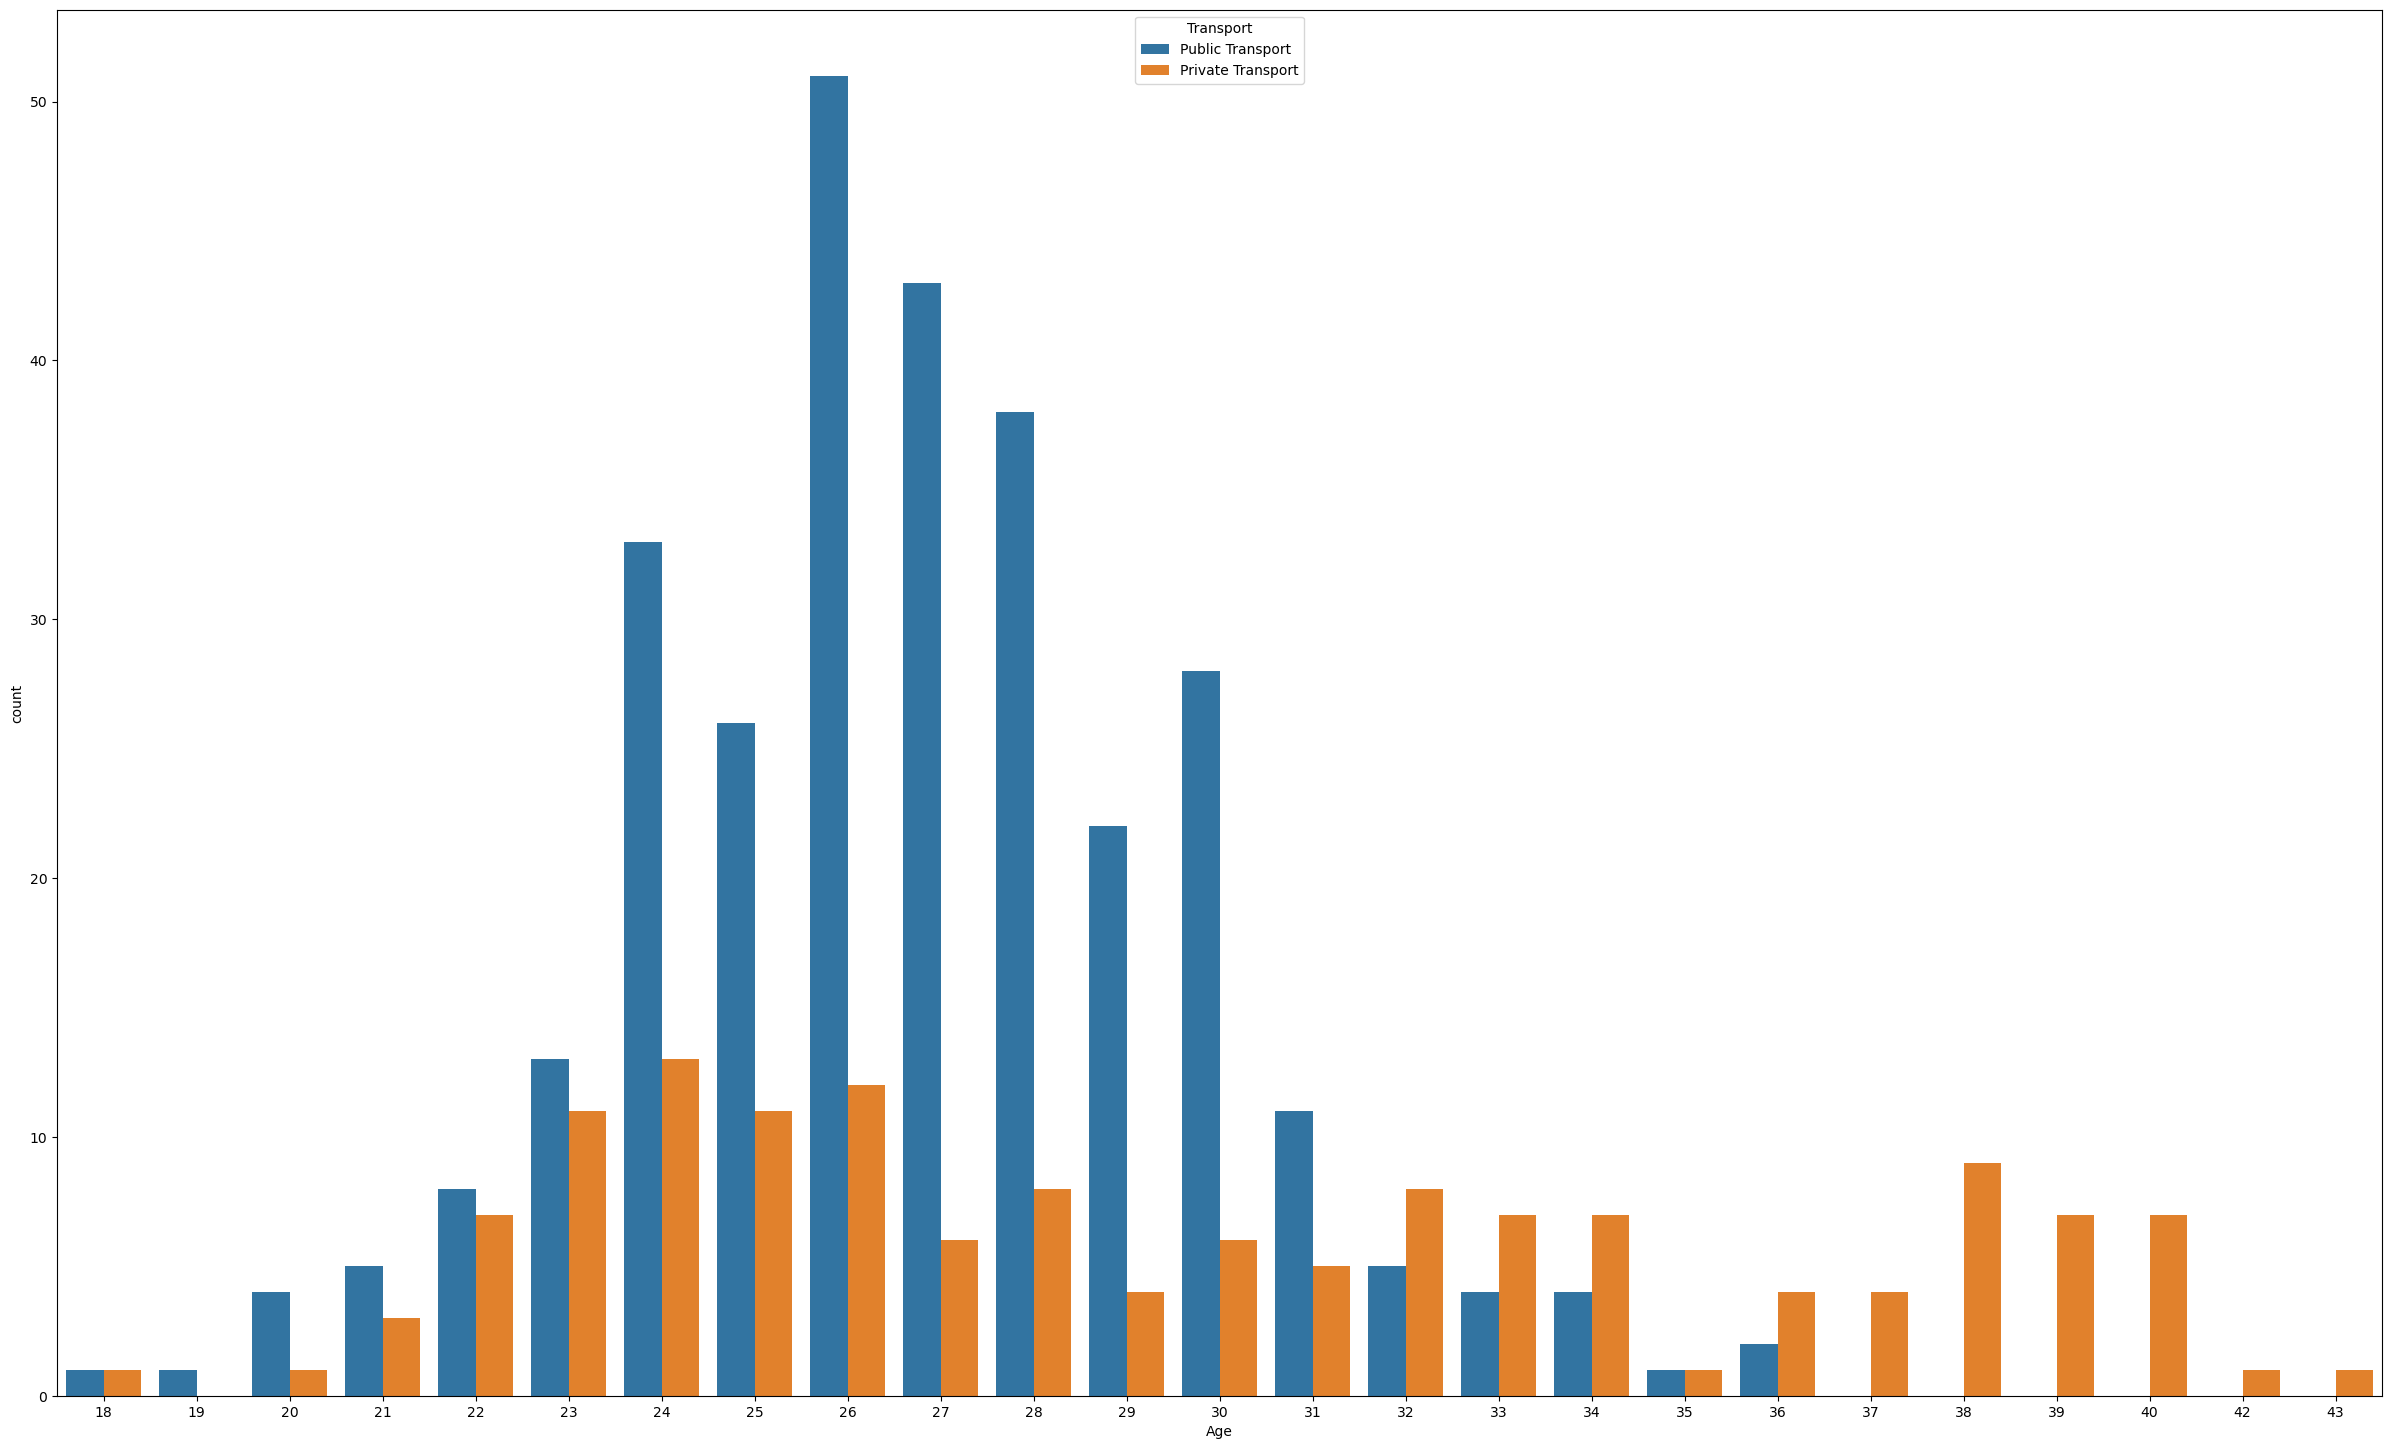

In [28]:
plt.figure(figsize=(30,18))
sns.countplot(x= df['Age'],hue = df['Transport']);

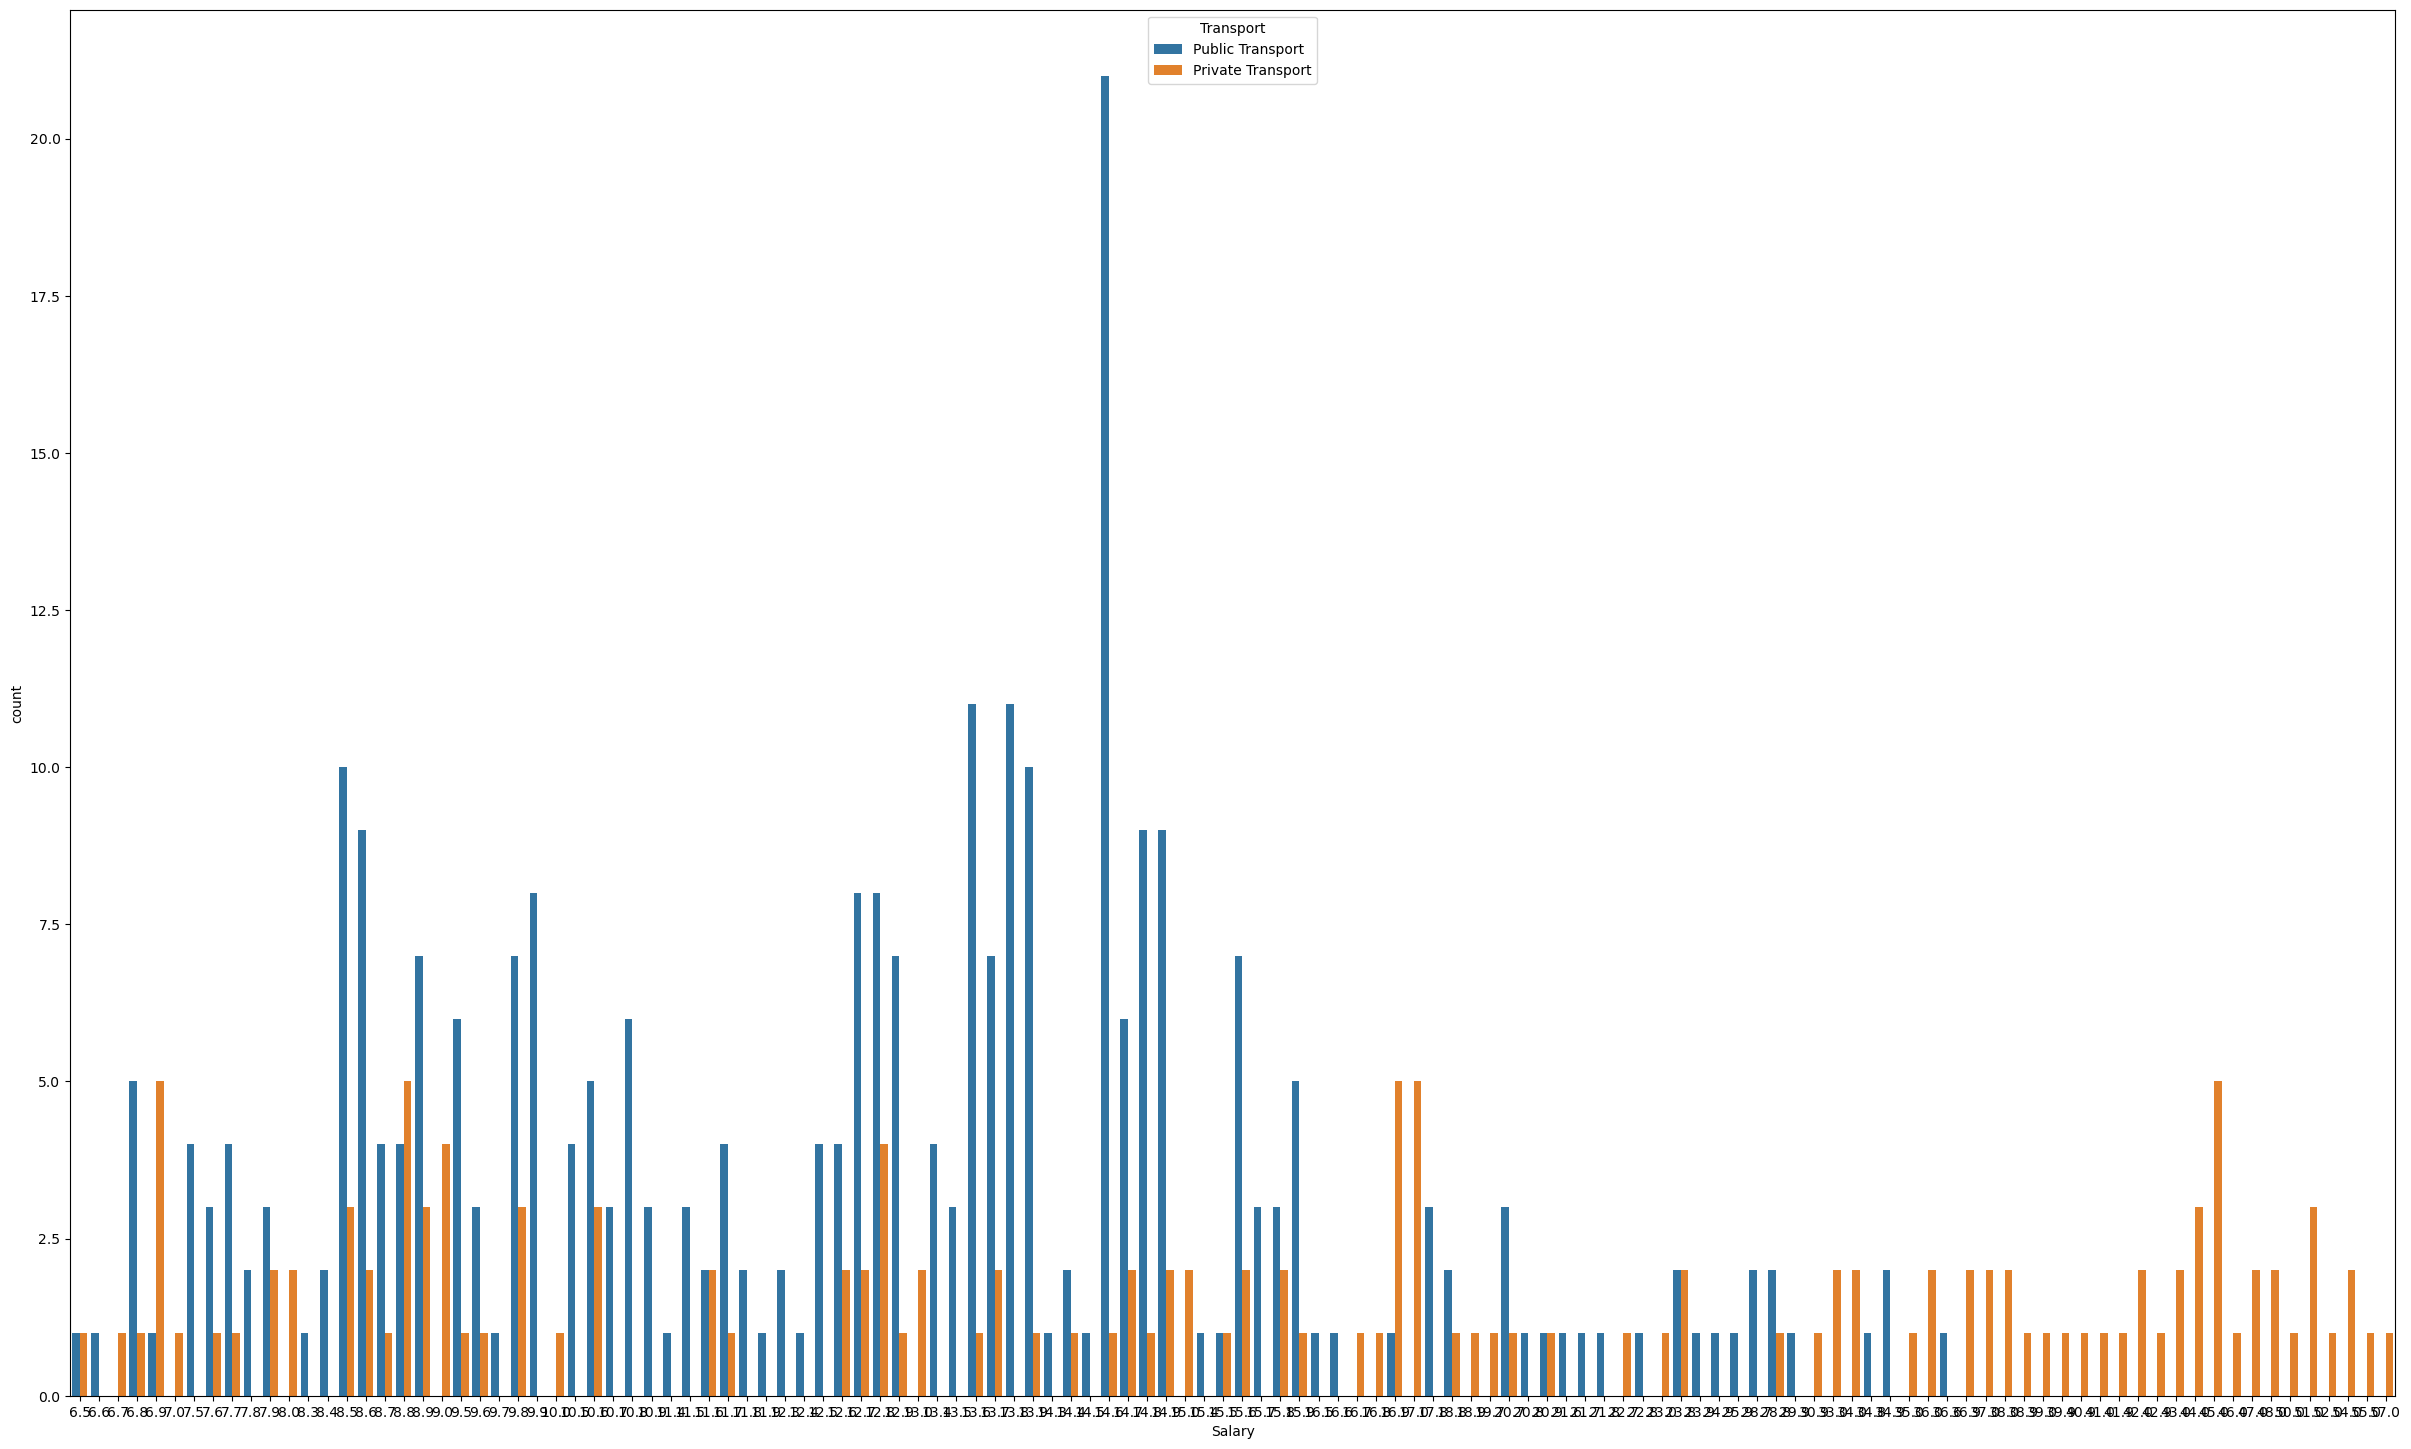

In [29]:
plt.figure(figsize=(30,18))
sns.countplot(x= df['Salary'],hue = df['Transport']);

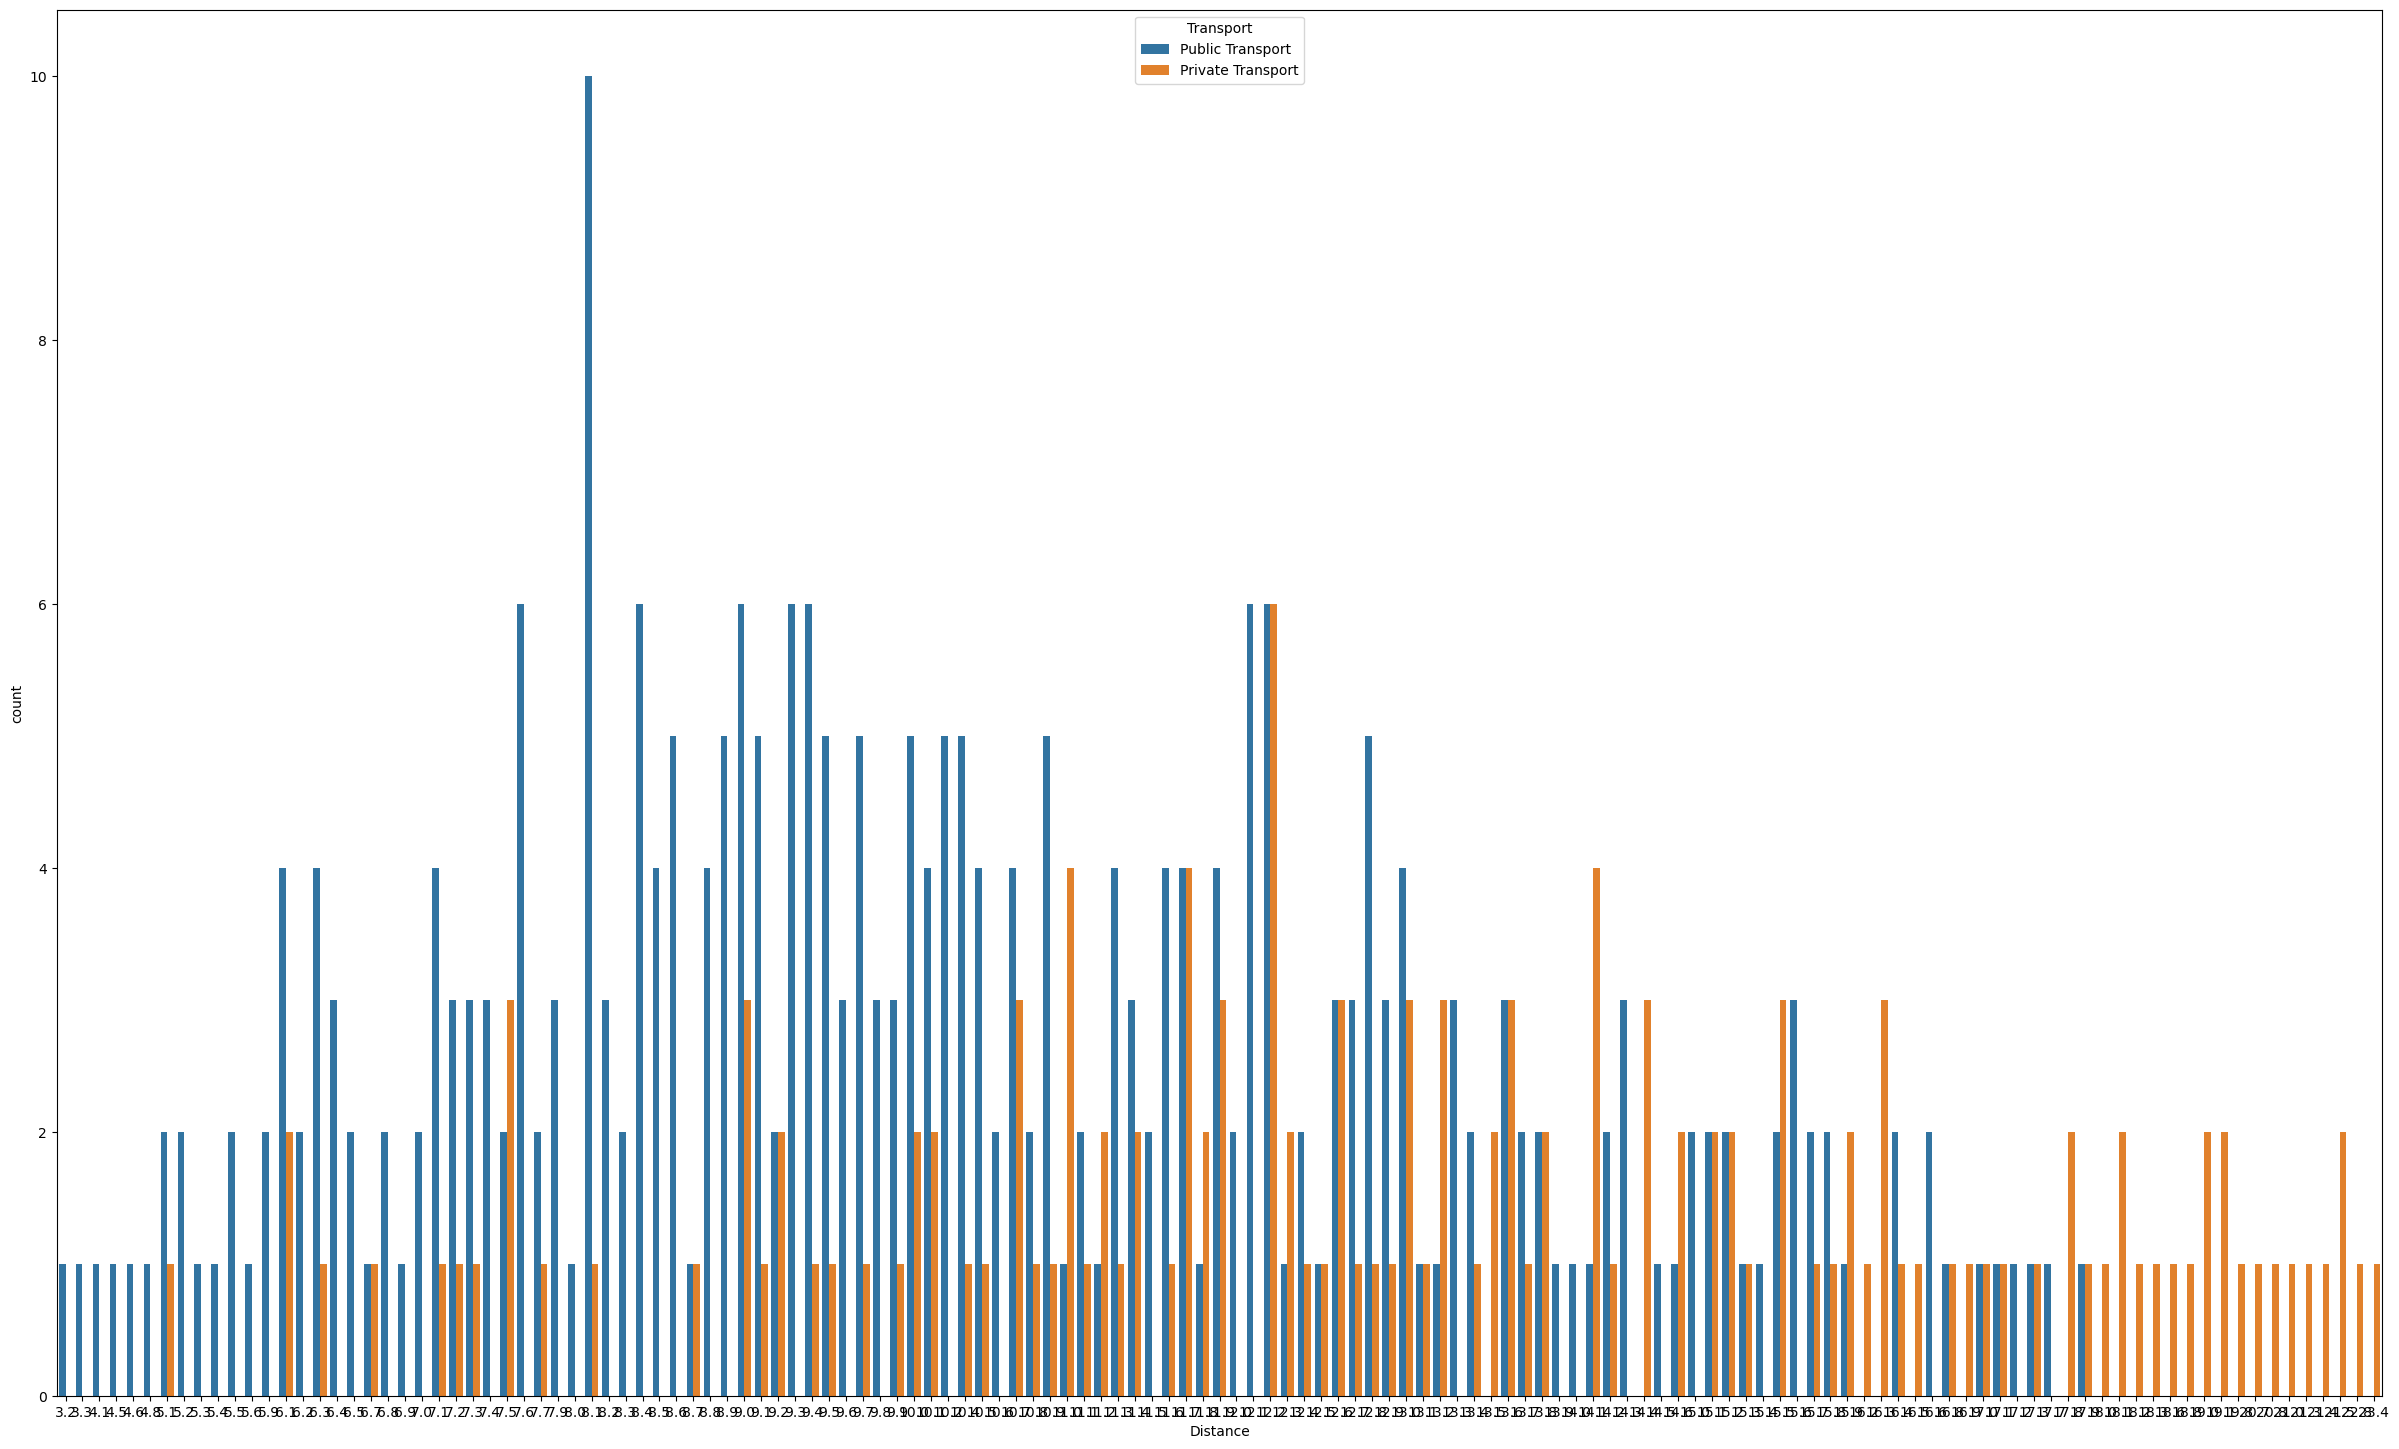

In [30]:
plt.figure(figsize=(30,18))
sns.countplot(x= df['Distance'],hue = df['Transport']);

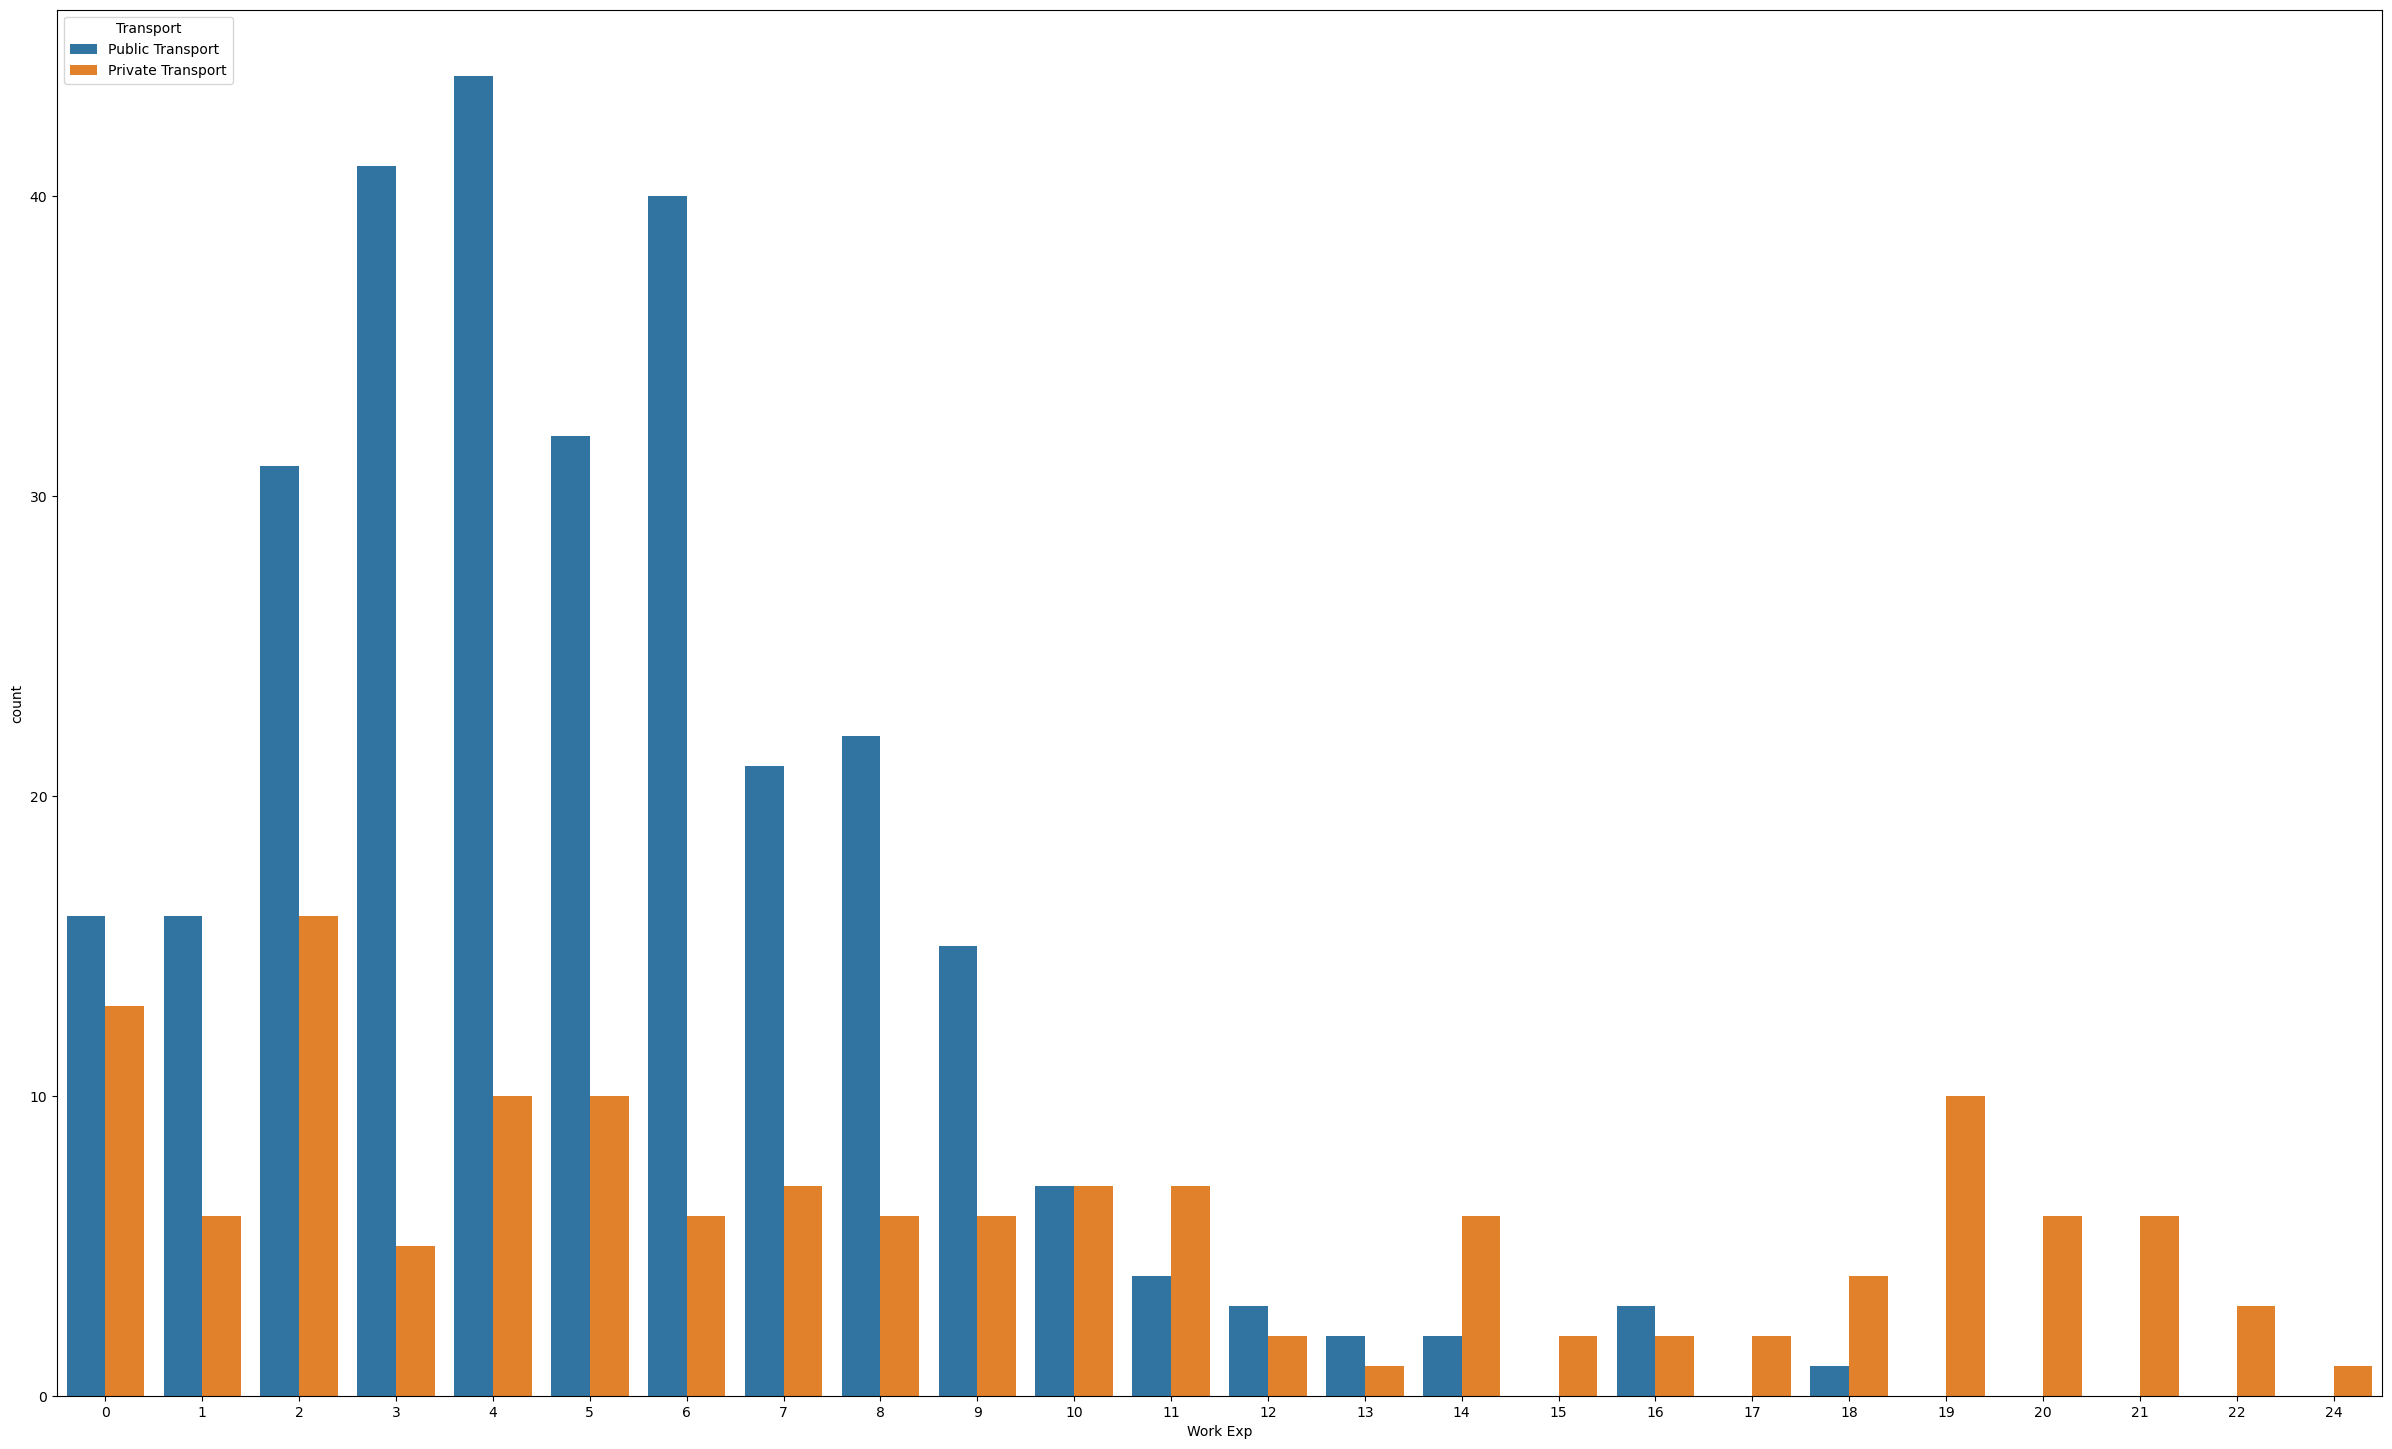

In [31]:
plt.figure(figsize=(30,18))
sns.countplot(x= df['Work Exp'],hue = df['Transport']);

In [32]:
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df[feature].unique()))
        print(pd.Categorical(df[feature].unique()).codes)
        df[feature] = pd.Categorical(df[feature]).codes



feature: Gender
['Male', 'Female']
Categories (2, object): ['Female', 'Male']
[1 0]


feature: Transport
['Public Transport', 'Private Transport']
Categories (2, object): ['Private Transport', 'Public Transport']
[1 0]


In [33]:
df.head()

,Age,Gender,Engineer,MBA,Work Exp,Salary,Distance,license,Transport
0,28,1,0,0,4,14.3,3.2,0,1
1,23,0,1,0,4,8.3,3.3,0,1
2,29,1,1,0,7,13.4,4.1,0,1
3,28,0,1,1,5,13.4,4.5,0,1
4,27,1,1,0,4,13.4,4.6,0,1


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444 entries, 0 to 443
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        444 non-null    int64  
 1   Gender     444 non-null    int8   
 2   Engineer   444 non-null    int64  
 3   MBA        444 non-null    int64  
 4   Work Exp   444 non-null    int64  
 5   Salary     444 non-null    float64
 6   Distance   444 non-null    float64
 7   license    444 non-null    int64  
 8   Transport  444 non-null    int8   
dtypes: float64(2), int64(5), int8(2)
memory usage: 25.3 KB


In [35]:
df.Transport.value_counts(normalize=True)

1    0.675676
0    0.324324
Name: Transport, dtype: float64

In [36]:
X = df.drop("Transport", axis=1)

y = df.pop("Transport")

X.head()

,Age,Gender,Engineer,MBA,Work Exp,Salary,Distance,license
0,28,1,0,0,4,14.3,3.2,0
1,23,0,1,0,4,8.3,3.3,0
2,29,1,1,0,7,13.4,4.1,0
3,28,0,1,1,5,13.4,4.5,0
4,27,1,1,0,4,13.4,4.6,0


In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)

In [38]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (310, 8)
X_test (134, 8)
y_train (310,)
y_test (134,)


In [39]:
X_train.head()

,Age,Gender,Engineer,MBA,Work Exp,Salary,Distance,license
201,29,1,0,0,5,15.9,10.5,0
386,27,1,1,1,6,12.9,15.6,0
329,27,1,1,0,6,12.9,13.3,0
249,23,1,1,0,0,6.9,11.7,0
349,30,1,1,0,7,14.9,14.0,0


In [40]:
sc=StandardScaler()

In [41]:
X_train_sc= pd.DataFrame(sc.fit_transform(X_train),columns=X_train.columns)
X_test_sc = pd.DataFrame(sc.transform(X_test),columns=X_test.columns)

In [42]:
knn=KNeighborsClassifier()
knn.fit(X_train_sc,y_train)

KNeighborsClassifier()

In [43]:
Y_train_predict = knn.predict(X_train_sc)
Y_test_predict = knn.predict(X_test_sc)

In [44]:
print("Train Accuracy is : {}".format(accuracy_score(y_train,Y_train_predict)))

print("\nTest Accuracy is : {}".format(accuracy_score(y_test,Y_test_predict)))


print("\nTrain ROC-AUC score is : {}".format(roc_auc_score(y_train,knn.predict_proba(X_train_sc)[:,1])))
print("\nTest ROC-AUC score is : {}".format(roc_auc_score(y_test,knn.predict_proba(X_test_sc)[:,1])))



print("\nConfusion matrix for train set : ","\n",confusion_matrix(y_train,Y_train_predict))
print("\nConfusion matrix for test set : ","\n",confusion_matrix(y_test,Y_test_predict))

Train Accuracy is : 0.8419354838709677

Test Accuracy is : 0.7835820895522388

Train ROC-AUC score is : 0.9224877450980392

Test ROC-AUC score is : 0.7496118012422359

Confusion matrix for train set :  
 [[ 64  38]
 [ 11 197]]

Confusion matrix for test set :  
 [[23 19]
 [10 82]]


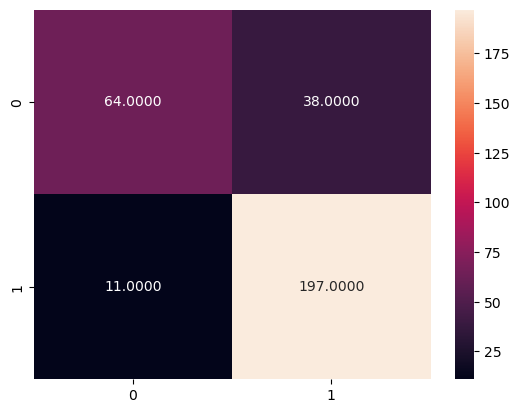

In [45]:
sns.heatmap(confusion_matrix(y_train,Y_train_predict),annot=True,fmt='.4f');

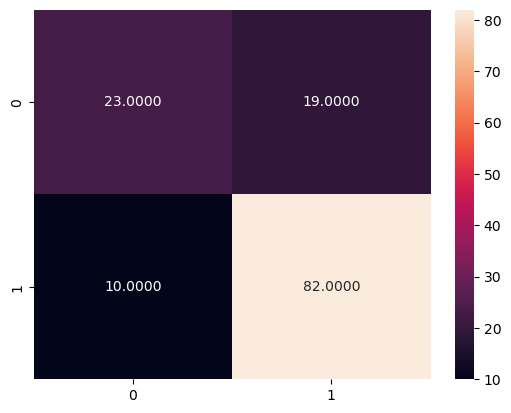

In [46]:
sns.heatmap(confusion_matrix(y_test,Y_test_predict),annot=True,fmt='.4f');

KNN Classifier: ROC AUC=0.922


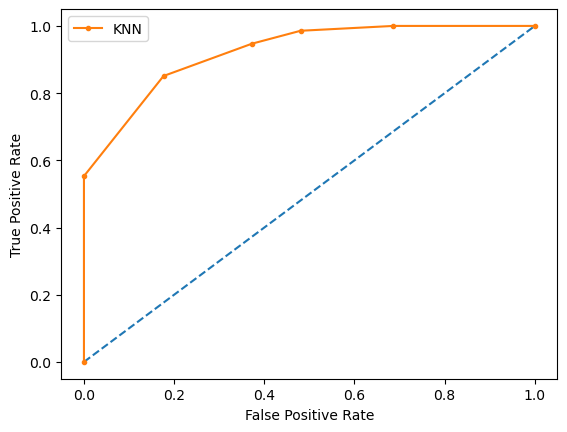

In [47]:
# KNN Classifier- 
lr_probs = knn.predict_proba(X_train_sc)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('KNN Classifier: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(lr_fpr, lr_tpr, marker='.', label='KNN')

# axis labels

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

KNN Classifier: ROC AUC=0.750


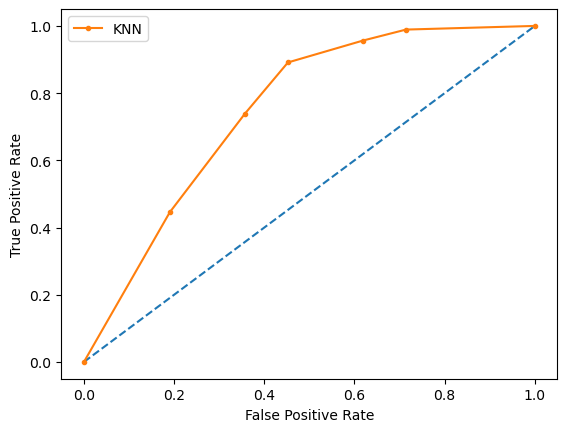

In [48]:
# KNN Classifier- 
lr_probs = knn.predict_proba(X_test_sc)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('KNN Classifier: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(lr_fpr, lr_tpr, marker='.', label='KNN')

# axis labels

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [49]:
print('Classification report Train set :')
print(classification_report(y_train,Y_train_predict))

Classification report Train set :
              precision    recall  f1-score   support

           0       0.85      0.63      0.72       102
           1       0.84      0.95      0.89       208

    accuracy                           0.84       310
   macro avg       0.85      0.79      0.81       310
weighted avg       0.84      0.84      0.83       310



In [50]:
print('Classification report Test set :')
print(classification_report(y_test,Y_test_predict))

Classification report Test set :
              precision    recall  f1-score   support

           0       0.70      0.55      0.61        42
           1       0.81      0.89      0.85        92

    accuracy                           0.78       134
   macro avg       0.75      0.72      0.73       134
weighted avg       0.78      0.78      0.78       134



In [51]:
# loading library
from sklearn.neighbors import KNeighborsClassifier

# initiantiate learning model (k = 3)
KNN_model=KNeighborsClassifier(n_neighbors = 3,metric='euclidean')

# fitting the model
KNN_model.fit(X_train,y_train)

# predict the response
y_test_predict = KNN_model.predict(X_test)

# evaluate accuracy
print("Accuracy Score for K=3 is ", KNN_model.score(X_test, y_test))

# initiantiate learning model (k = 5)
KNN_model=KNeighborsClassifier(n_neighbors = 5,metric='euclidean')

# fitting the model
KNN_model.fit(X_train,y_train)

# predict the response
y_test_predict = KNN_model.predict(X_test)

# evaluate accuracy
print("Accuracy Score for K=5 is ", KNN_model.score(X_test, y_test))

# initiantiate learning model (k = 9)
from sklearn.neighbors import KNeighborsClassifier
KNN_model=KNeighborsClassifier(n_neighbors = 9,metric='euclidean')

# fitting the model
KNN_model.fit(X_train,y_train)

# predict the response
y_test_predict = KNN_model.predict(X_test)

# evaluate accuracy
print("Accuracy Score for K=9 is ", KNN_model.score(X_test, y_test))

Accuracy Score for K=3 is  0.7686567164179104
Accuracy Score for K=5 is  0.753731343283582
Accuracy Score for K=9 is  0.746268656716418


In [52]:
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in range(1,20,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    # evaluate accuracy
    scores = knn.score(X_test, y_test)
    ac_scores.append(scores)

# changing to misclassification error
MCE = [1 - x for x in ac_scores]
MCE

[0.23134328358208955,
 0.23134328358208955,
 0.24626865671641796,
 0.23880597014925375,
 0.25373134328358204,
 0.25373134328358204,
 0.23134328358208955,
 0.26119402985074625,
 0.27611940298507465,
 0.26865671641791045]

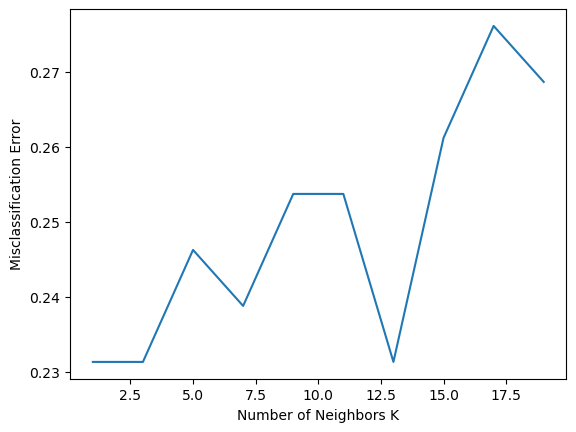

In [53]:
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(range(1,20,2), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [54]:
params = {'n_neighbors':[3,5,7],
         'weights':['uniform', 'distance'],'p':[1,2,3]}

In [55]:
grid_knn = GridSearchCV(KNeighborsClassifier(),param_grid=params,refit=True,verbose=1,n_jobs=-1)
grid_knn.fit(X_train_sc,y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 7], 'p': [1, 2, 3],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [56]:
grid_knn.best_params_

{'n_neighbors': 5, 'p': 1, 'weights': 'distance'}

In [57]:
best_model = grid_knn.best_estimator_

In [58]:
Grid_train_predict=best_model.predict(X_train_sc)
Grid_test_predict=best_model.predict(X_test_sc)

In [59]:
print("Train Accuracy is : {}".format(accuracy_score(y_train,Grid_train_predict)))

print("\nTest Accuracy is : {}".format(accuracy_score(y_test,Grid_test_predict)))


print("\nTrain ROC-AUC score is : {}".format(roc_auc_score(y_train,grid_knn.predict_proba(X_train_sc)[:,1])))
print("\nTest ROC-AUC score is : {}".format(roc_auc_score(y_test,grid_knn.predict_proba(X_test_sc)[:,1])))



print("\nConfusion matrix for train set : ","\n",confusion_matrix(y_train,Grid_train_predict))
print("\nConfusion matrix for test set : ","\n",confusion_matrix(y_test,Grid_test_predict))

Train Accuracy is : 1.0

Test Accuracy is : 0.7611940298507462

Train ROC-AUC score is : 1.0

Test ROC-AUC score is : 0.7458592132505175

Confusion matrix for train set :  
 [[102   0]
 [  0 208]]

Confusion matrix for test set :  
 [[24 18]
 [14 78]]


In [60]:
print('Classification report Train set :')
print(classification_report(y_train,Grid_train_predict))

Classification report Train set :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       102
           1       1.00      1.00      1.00       208

    accuracy                           1.00       310
   macro avg       1.00      1.00      1.00       310
weighted avg       1.00      1.00      1.00       310



In [61]:
print('Classification report Test set :')
print(classification_report(y_test,Grid_test_predict))

Classification report Test set :
              precision    recall  f1-score   support

           0       0.63      0.57      0.60        42
           1       0.81      0.85      0.83        92

    accuracy                           0.76       134
   macro avg       0.72      0.71      0.71       134
weighted avg       0.76      0.76      0.76       134



KNN Classifier: ROC AUC=0.746


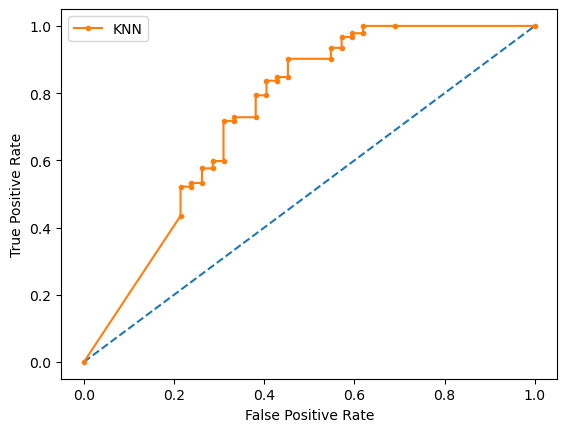

In [62]:
# KNN Classifier- 
lr_probs = grid_knn.predict_proba(X_test_sc)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('KNN Classifier: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(lr_fpr, lr_tpr, marker='.', label='KNN')

# axis labels

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

KNN Classifier: ROC AUC=1.000


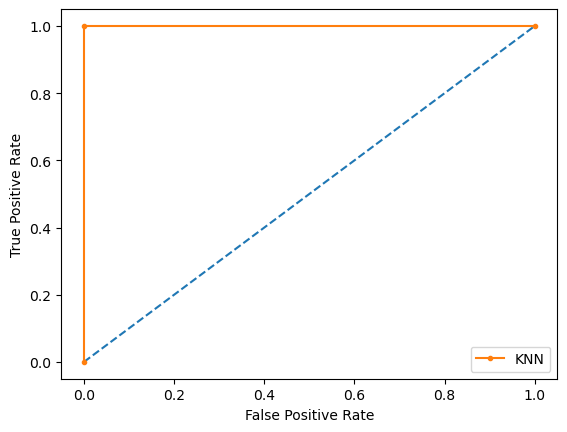

In [63]:
# KNN Classifier- 
lr_probs = grid_knn.predict_proba(X_train_sc)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('KNN Classifier: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(lr_fpr, lr_tpr, marker='.', label='KNN')

# axis labels

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

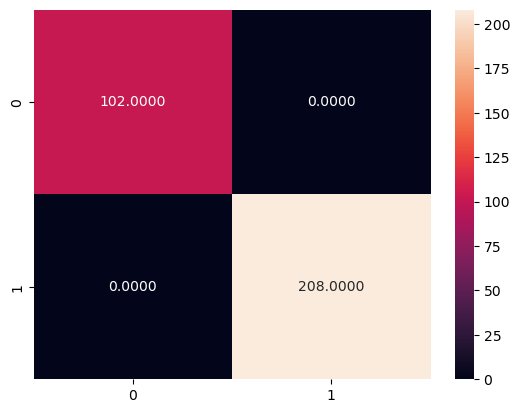

In [64]:
sns.heatmap(confusion_matrix(y_train,Grid_train_predict),annot=True,fmt='.4f');

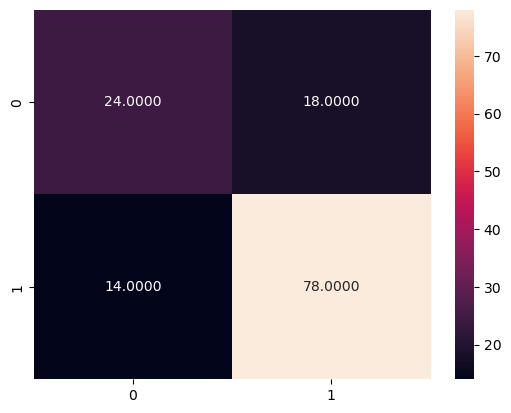

In [65]:
sns.heatmap(confusion_matrix(y_test,Grid_test_predict),annot=True,fmt='.4f');

In [66]:
import matplotlib.pyplot as plt

In [67]:
from sklearn.preprocessing import LabelEncoder

In [68]:
LE = LabelEncoder()

In [69]:
df_logit.head()

,Age,Gender,Engineer,MBA,Work Exp,Salary,Distance,license,Transport
0,28,Male,0,0,4,14.3,3.2,0,Public Transport
1,23,Female,1,0,4,8.3,3.3,0,Public Transport
2,29,Male,1,0,7,13.4,4.1,0,Public Transport
3,28,Female,1,1,5,13.4,4.5,0,Public Transport
4,27,Male,1,0,4,13.4,4.6,0,Public Transport


In [70]:
df_logit['Transport'] = LE.fit_transform(df_logit['Transport'] )
df_logit.head()

,Age,Gender,Engineer,MBA,Work Exp,Salary,Distance,license,Transport
0,28,Male,0,0,4,14.3,3.2,0,1
1,23,Female,1,0,4,8.3,3.3,0,1
2,29,Male,1,0,7,13.4,4.1,0,1
3,28,Female,1,1,5,13.4,4.5,0,1
4,27,Male,1,0,4,13.4,4.6,0,1


In [71]:
df_logit.rename(columns={'Work Exp':'Work_Exp'},inplace=True)

In [72]:
df_logit.head()

,Age,Gender,Engineer,MBA,Work_Exp,Salary,Distance,license,Transport
0,28,Male,0,0,4,14.3,3.2,0,1
1,23,Female,1,0,4,8.3,3.3,0,1
2,29,Male,1,0,7,13.4,4.1,0,1
3,28,Female,1,1,5,13.4,4.5,0,1
4,27,Male,1,0,4,13.4,4.6,0,1


In [73]:
df_logit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444 entries, 0 to 443
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        444 non-null    int64  
 1   Gender     444 non-null    object 
 2   Engineer   444 non-null    int64  
 3   MBA        444 non-null    int64  
 4   Work_Exp   444 non-null    int64  
 5   Salary     444 non-null    float64
 6   Distance   444 non-null    float64
 7   license    444 non-null    int64  
 8   Transport  444 non-null    int32  
dtypes: float64(2), int32(1), int64(5), object(1)
memory usage: 29.6+ KB


In [74]:
df_logit_dummy = pd.get_dummies(df_logit,drop_first=True)
df_logit_dummy.head()

,Age,Engineer,MBA,Work_Exp,Salary,Distance,license,Transport,Gender_Male
0,28,0,0,4,14.3,3.2,0,1,1
1,23,1,0,4,8.3,3.3,0,1,0
2,29,1,0,7,13.4,4.1,0,1,1
3,28,1,1,5,13.4,4.5,0,1,0
4,27,1,0,4,13.4,4.6,0,1,1


In [75]:
df_logit_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444 entries, 0 to 443
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          444 non-null    int64  
 1   Engineer     444 non-null    int64  
 2   MBA          444 non-null    int64  
 3   Work_Exp     444 non-null    int64  
 4   Salary       444 non-null    float64
 5   Distance     444 non-null    float64
 6   license      444 non-null    int64  
 7   Transport    444 non-null    int32  
 8   Gender_Male  444 non-null    uint8  
dtypes: float64(2), int32(1), int64(5), uint8(1)
memory usage: 26.6 KB


In [76]:
import statsmodels.formula.api as sm

In [77]:
df_logit_dummy.columns

Index(['Age', 'Engineer', 'MBA', 'Work_Exp', 'Salary', 'Distance', 'license',
       'Transport', 'Gender_Male'],
      dtype='object')

In [78]:
formula_1 = 'Transport ~ Age + Engineer + MBA + Work_Exp + Salary + Distance + license + Gender_Male'

In [79]:
Logistic_1 = sm.logit(formula=formula_1,data=df_logit_dummy).fit()

Optimization terminated successfully.
         Current function value: 0.437944
         Iterations 7


In [80]:
print(Logistic_1.summary())

                           Logit Regression Results                           
Dep. Variable:              Transport   No. Observations:                  444
Model:                          Logit   Df Residuals:                      435
Method:                           MLE   Df Model:                            8
Date:                Sun, 19 Mar 2023   Pseudo R-squ.:                  0.3049
Time:                        17:29:35   Log-Likelihood:                -194.45
converged:                       True   LL-Null:                       -279.76
Covariance Type:            nonrobust   LLR p-value:                 9.551e-33
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.8340      1.788     -0.466      0.641      -4.339       2.671
Age             0.2083      0.077      2.706      0.007       0.057       0.359
Engineer       -0.1543      0.296     -0.521    

In [81]:
from sklearn.model_selection import train_test_split

In [82]:
Train,Test = train_test_split(df_logit_dummy,test_size=0.3,random_state=1,stratify=df_logit_dummy['Transport'])

In [83]:
Train.columns

Index(['Age', 'Engineer', 'MBA', 'Work_Exp', 'Salary', 'Distance', 'license',
       'Transport', 'Gender_Male'],
      dtype='object')

In [84]:
from sklearn.linear_model import LogisticRegression

In [85]:
LR = LogisticRegression(solver='newton-cg',penalty='none')

In [86]:
model_1 = LR.fit(Train[['Age', 'Engineer', 'MBA', 'Work_Exp', 'Salary', 'Distance', 'license','Gender_Male']],Train['Transport'])

In [87]:
print('Accuracy Score of Model 1:',model_1.score(Train[['Age','Engineer','MBA','Work_Exp','Salary','Distance','license','Gender_Male']],Train['Transport']))

Accuracy Score of Model 1: 0.8193548387096774


In [88]:
print('Accuracy Score of Model 1:',model_1.score(Test[['Age','Engineer','MBA','Work_Exp','Salary','Distance','license','Gender_Male']],Test['Transport']))

Accuracy Score of Model 1: 0.8059701492537313


In [89]:
model_1_test_class = model_1.predict(Test[['Age','Engineer','MBA','Work_Exp','Salary','Distance','license','Gender_Male']])
model_1_test_probabilities = model_1.predict_proba(Test[['Age','Engineer','MBA','Work_Exp','Salary','Distance','license','Gender_Male']])

In [90]:
model_1_train_class = model_1.predict(Train[['Age','Engineer','MBA','Work_Exp','Salary','Distance','license','Gender_Male']])
model_1_train_probabilities = model_1.predict_proba(Train[['Age','Engineer','MBA','Work_Exp','Salary','Distance','license','Gender_Male']])

In [91]:
from sklearn.metrics import accuracy_score,confusion_matrix

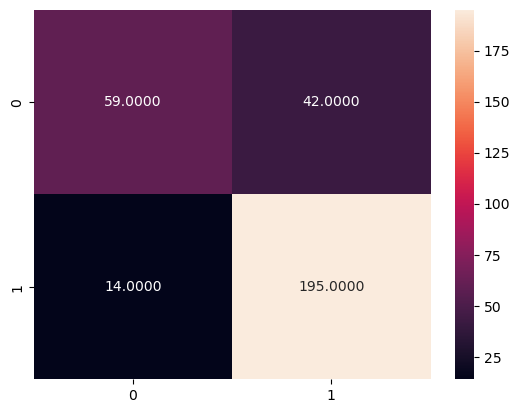

In [92]:
sns.heatmap(confusion_matrix(Train['Transport'],model_1_train_class),annot=True,fmt='.4f');

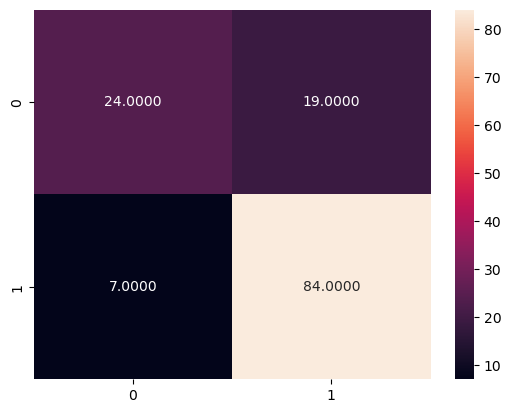

In [93]:
sns.heatmap(confusion_matrix(Test['Transport'],model_1_test_class),annot=True,fmt='.4f');

In [94]:
from sklearn import metrics

In [95]:
print('Model 1')
print(metrics.classification_report(Train['Transport'],model_1_train_class),'\n')

Model 1
              precision    recall  f1-score   support

           0       0.81      0.58      0.68       101
           1       0.82      0.93      0.87       209

    accuracy                           0.82       310
   macro avg       0.82      0.76      0.78       310
weighted avg       0.82      0.82      0.81       310
 



In [96]:
print('Model 1')
print(metrics.classification_report(Test['Transport'],model_1_test_class),'\n')

Model 1
              precision    recall  f1-score   support

           0       0.77      0.56      0.65        43
           1       0.82      0.92      0.87        91

    accuracy                           0.81       134
   macro avg       0.79      0.74      0.76       134
weighted avg       0.80      0.81      0.80       134
 



In [97]:
from pylab import rcParams
rcParams['figure.figsize'] = 15,8

Model 1 AUC: 0.78686


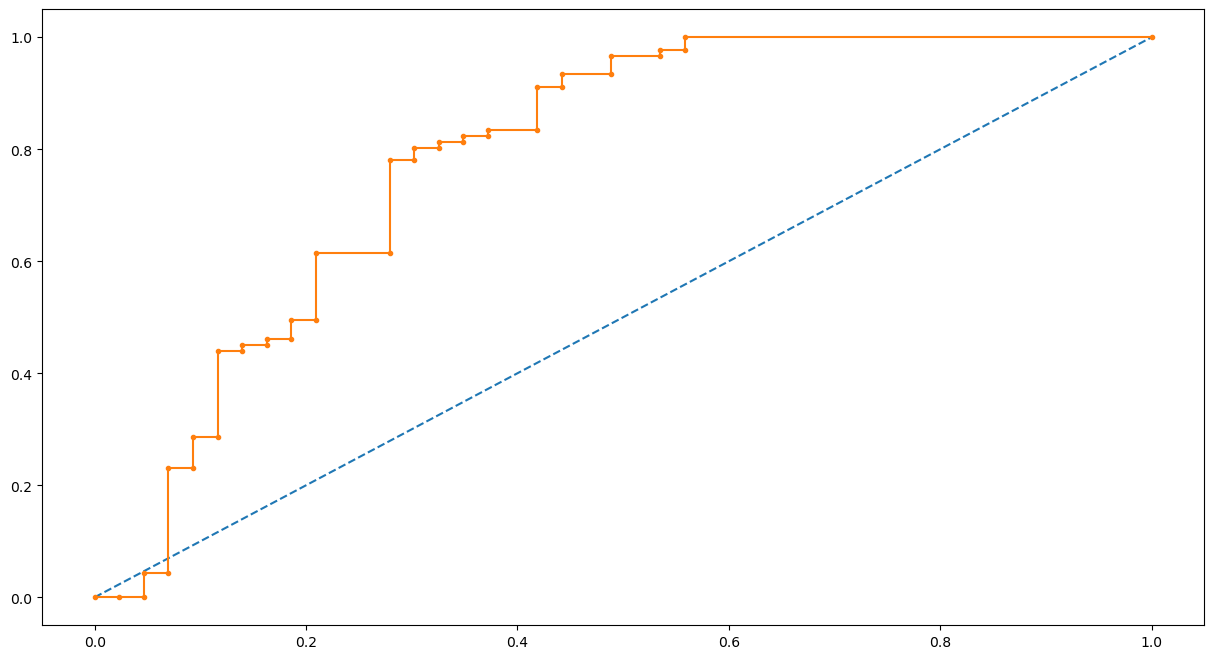

In [98]:
# AUC and ROC for the model 1


# calculating on the basis of a person not defaulting
# calculate AUC
auc = metrics.roc_auc_score(Test['Transport'],model_1_test_probabilities[:, 1])#keeping only the probabilities for the desired class outcome
print('Model 1 AUC: %.5f' % auc)
# # calculate roc curve
# from sklearn.metrics import roc_curve
fpr, tpr, thresholds = metrics.roc_curve(Test['Transport'],model_1_test_probabilities[:, 1])#keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

Model 1 AUC: 0.84585


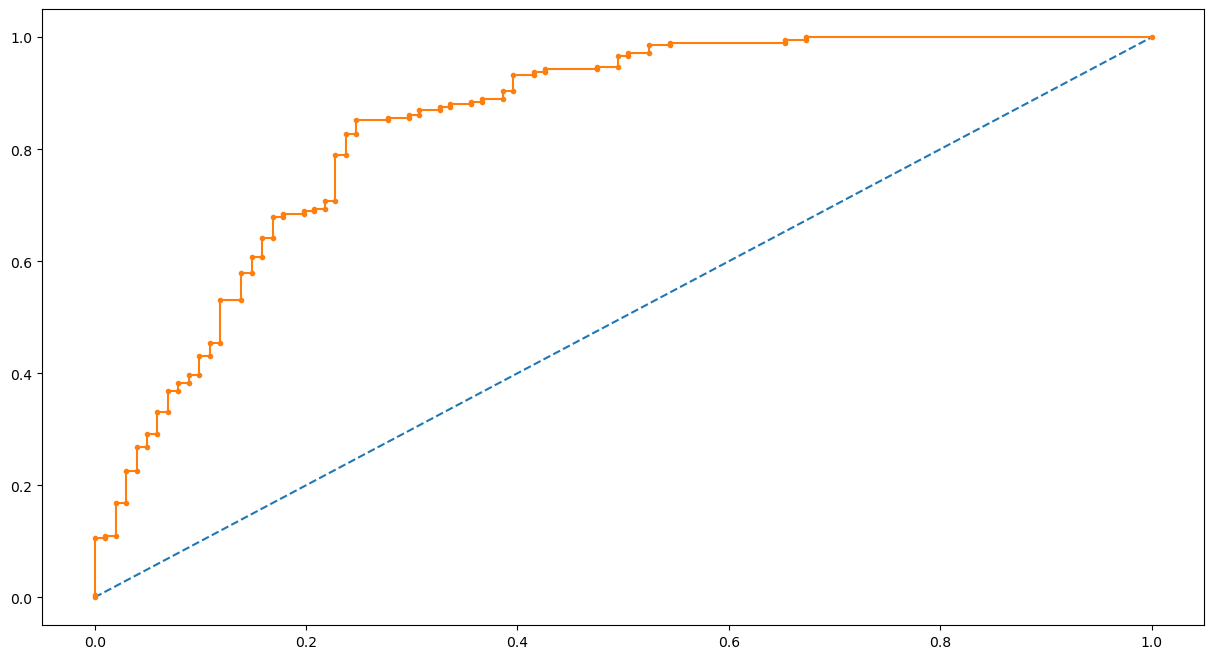

In [99]:
# AUC and ROC for the model 1


# calculating on the basis of a person not defaulting
# calculate AUC
auc = metrics.roc_auc_score(Train['Transport'],model_1_train_probabilities[:, 1])#keeping only the probabilities for the desired class outcome
print('Model 1 AUC: %.5f' % auc)
# # calculate roc curve
# from sklearn.metrics import roc_curve
fpr, tpr, thresholds = metrics.roc_curve(Train['Transport'],model_1_train_probabilities[:, 1])#keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [100]:
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X, y, test_size=.30, random_state=1)

In [101]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


In [102]:
logreg = LogisticRegression()

In [103]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10],
              'penalty': ['l1', 'l2'],
              'solver': ['liblinear', 'saga'],
              'max_iter': [100, 500, 1000]}


In [104]:
grid_search = GridSearchCV(logreg, param_grid, cv=5)

In [105]:
grid_search.fit(X_train_log, y_train_log)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'max_iter': [100, 500, 1000], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']})

In [106]:
print(grid_search.best_params_)

{'C': 10, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'saga'}


In [107]:
best_model_log = grid_search.best_estimator_

In [108]:
Grid_train_predict=best_model_log.predict(X_train_log)
Grid_test_predict=best_model_log.predict(X_test_log)

In [109]:
print("Train Accuracy is : {}".format(accuracy_score(y_train_log,Grid_train_predict)))

print("\nTest Accuracy is : {}".format(accuracy_score(y_test_log,Grid_test_predict)))


print("\nTrain ROC-AUC score is : {}".format(roc_auc_score(y_train_log,grid_search.predict_proba(X_train_log)[:,1])))
print("\nTest ROC-AUC score is : {}".format(roc_auc_score(y_test_log,grid_search.predict_proba(X_test_log)[:,1])))



print("\nConfusion matrix for train set : ","\n",confusion_matrix(y_train_log,Grid_train_predict))
print("\nConfusion matrix for test set : ","\n",confusion_matrix(y_test_log,Grid_test_predict))

Train Accuracy is : 0.7870967741935484

Test Accuracy is : 0.8208955223880597

Train ROC-AUC score is : 0.8284785067873303

Test ROC-AUC score is : 0.8219461697722568

Confusion matrix for train set :  
 [[ 53  49]
 [ 17 191]]

Confusion matrix for test set :  
 [[25 17]
 [ 7 85]]


In [110]:
print('Classification report Train set :')
print(classification_report(y_train_log,Grid_train_predict))

Classification report Train set :
              precision    recall  f1-score   support

           0       0.76      0.52      0.62       102
           1       0.80      0.92      0.85       208

    accuracy                           0.79       310
   macro avg       0.78      0.72      0.73       310
weighted avg       0.78      0.79      0.77       310



In [111]:
print('Classification report Test set :')
print(classification_report(y_test_log,Grid_test_predict))

Classification report Test set :
              precision    recall  f1-score   support

           0       0.78      0.60      0.68        42
           1       0.83      0.92      0.88        92

    accuracy                           0.82       134
   macro avg       0.81      0.76      0.78       134
weighted avg       0.82      0.82      0.81       134



Logistic Classifier: ROC AUC=0.822


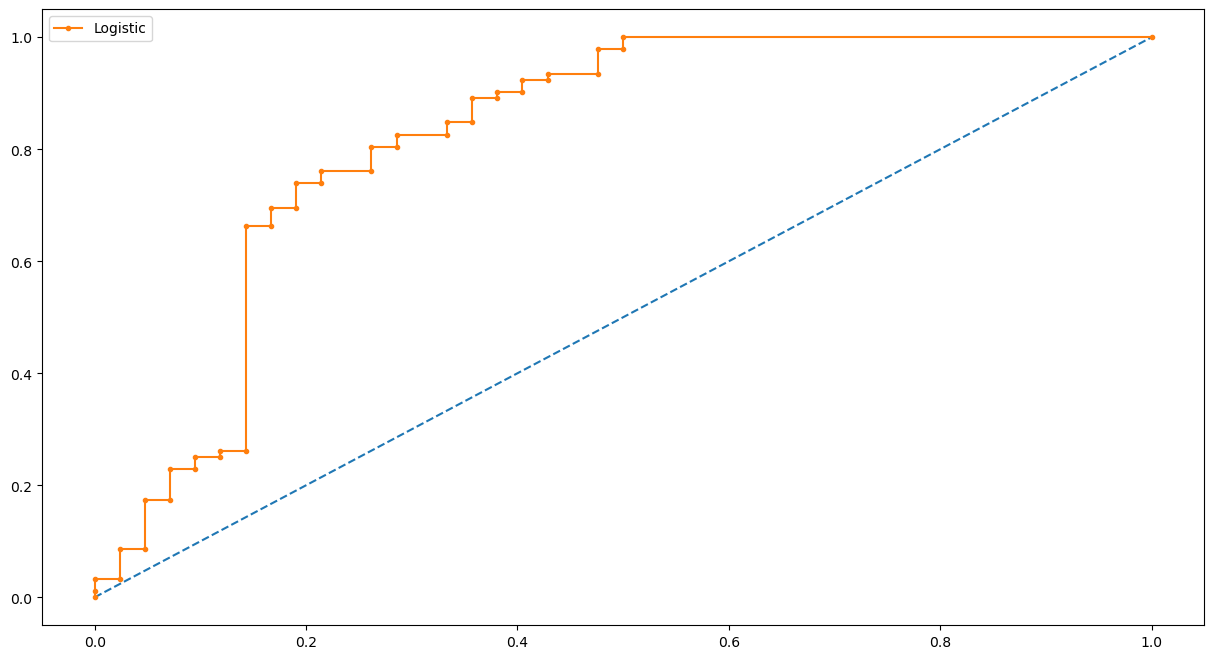

In [112]:
lr_probs = grid_search.predict_proba(X_test_log)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
lr_auc = roc_auc_score(y_test_log, lr_probs)
# summarize scores
print('Logistic Classifier: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_test_log, lr_probs)
# plot the roc curve for the model
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')

# show the legend
plt.legend()
# show the plot
plt.show()

Logistic Classifier: ROC AUC=0.828


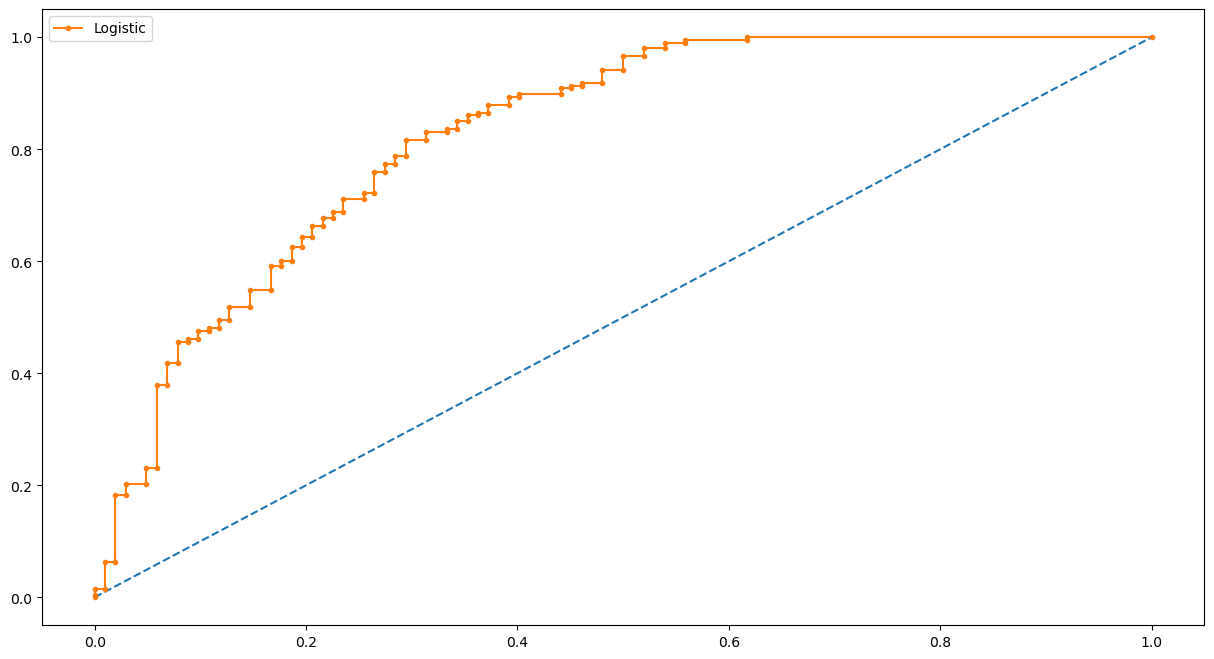

In [113]:
lr_probs = grid_search.predict_proba(X_train_log)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
lr_auc = roc_auc_score(y_train_log, lr_probs)
# summarize scores
print('Logistic Classifier: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_train_log, lr_probs)
# plot the roc curve for the model
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')

# show the legend
plt.legend()
# show the plot
plt.show()

In [114]:
df_rf.head()

,Age,Gender,Engineer,MBA,Work Exp,Salary,Distance,license,Transport
0,28,Male,0,0,4,14.3,3.2,0,Public Transport
1,23,Female,1,0,4,8.3,3.3,0,Public Transport
2,29,Male,1,0,7,13.4,4.1,0,Public Transport
3,28,Female,1,1,5,13.4,4.5,0,Public Transport
4,27,Male,1,0,4,13.4,4.6,0,Public Transport


In [115]:
df_rf['Transport'] = LE.fit_transform(df_rf['Transport'] )
df_rf.head()

,Age,Gender,Engineer,MBA,Work Exp,Salary,Distance,license,Transport
0,28,Male,0,0,4,14.3,3.2,0,1
1,23,Female,1,0,4,8.3,3.3,0,1
2,29,Male,1,0,7,13.4,4.1,0,1
3,28,Female,1,1,5,13.4,4.5,0,1
4,27,Male,1,0,4,13.4,4.6,0,1


In [116]:
df_rf.rename(columns={'Work Exp':'Work_Exp'},inplace=True)

In [117]:
df_rf.head()

,Age,Gender,Engineer,MBA,Work_Exp,Salary,Distance,license,Transport
0,28,Male,0,0,4,14.3,3.2,0,1
1,23,Female,1,0,4,8.3,3.3,0,1
2,29,Male,1,0,7,13.4,4.1,0,1
3,28,Female,1,1,5,13.4,4.5,0,1
4,27,Male,1,0,4,13.4,4.6,0,1


In [118]:
df_rf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444 entries, 0 to 443
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        444 non-null    int64  
 1   Gender     444 non-null    object 
 2   Engineer   444 non-null    int64  
 3   MBA        444 non-null    int64  
 4   Work_Exp   444 non-null    int64  
 5   Salary     444 non-null    float64
 6   Distance   444 non-null    float64
 7   license    444 non-null    int64  
 8   Transport  444 non-null    int32  
dtypes: float64(2), int32(1), int64(5), object(1)
memory usage: 29.6+ KB


In [119]:
df_rf_dummy = pd.get_dummies(df_rf,drop_first=True)
df_rf_dummy.head()

,Age,Engineer,MBA,Work_Exp,Salary,Distance,license,Transport,Gender_Male
0,28,0,0,4,14.3,3.2,0,1,1
1,23,1,0,4,8.3,3.3,0,1,0
2,29,1,0,7,13.4,4.1,0,1,1
3,28,1,1,5,13.4,4.5,0,1,0
4,27,1,0,4,13.4,4.6,0,1,1


In [120]:
df_rf_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444 entries, 0 to 443
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          444 non-null    int64  
 1   Engineer     444 non-null    int64  
 2   MBA          444 non-null    int64  
 3   Work_Exp     444 non-null    int64  
 4   Salary       444 non-null    float64
 5   Distance     444 non-null    float64
 6   license      444 non-null    int64  
 7   Transport    444 non-null    int32  
 8   Gender_Male  444 non-null    uint8  
dtypes: float64(2), int32(1), int64(5), uint8(1)
memory usage: 26.6 KB


In [121]:
X_rf = df_rf_dummy.drop("Transport" , axis=1)
y_rf = df_rf_dummy.pop("Transport")

In [122]:
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size=.30, random_state=1)

In [123]:
from sklearn.ensemble import RandomForestClassifier

In [124]:
random_state=[0,23,42]
for i in random_state:
    rf=RandomForestClassifier(random_state=i,oob_score=True)
    rf.fit(X_train_rf,y_train_rf)
    print(rf.oob_score_)

0.8193548387096774
0.8258064516129032
0.8354838709677419


In [125]:
rfcl = RandomForestClassifier(n_estimators = 100,max_features=6,random_state=1)
rfcl = rfcl.fit(X_train_rf, y_train_rf)

In [126]:
rfcl

RandomForestClassifier(max_features=6, random_state=1)

In [127]:
ytrain_predict = rfcl.predict(X_train_rf)
ytest_predict = rfcl.predict(X_test_rf)

In [128]:
rfcl.score(X_train_rf,y_train_rf)

1.0

In [129]:
from sklearn.metrics import confusion_matrix,classification_report

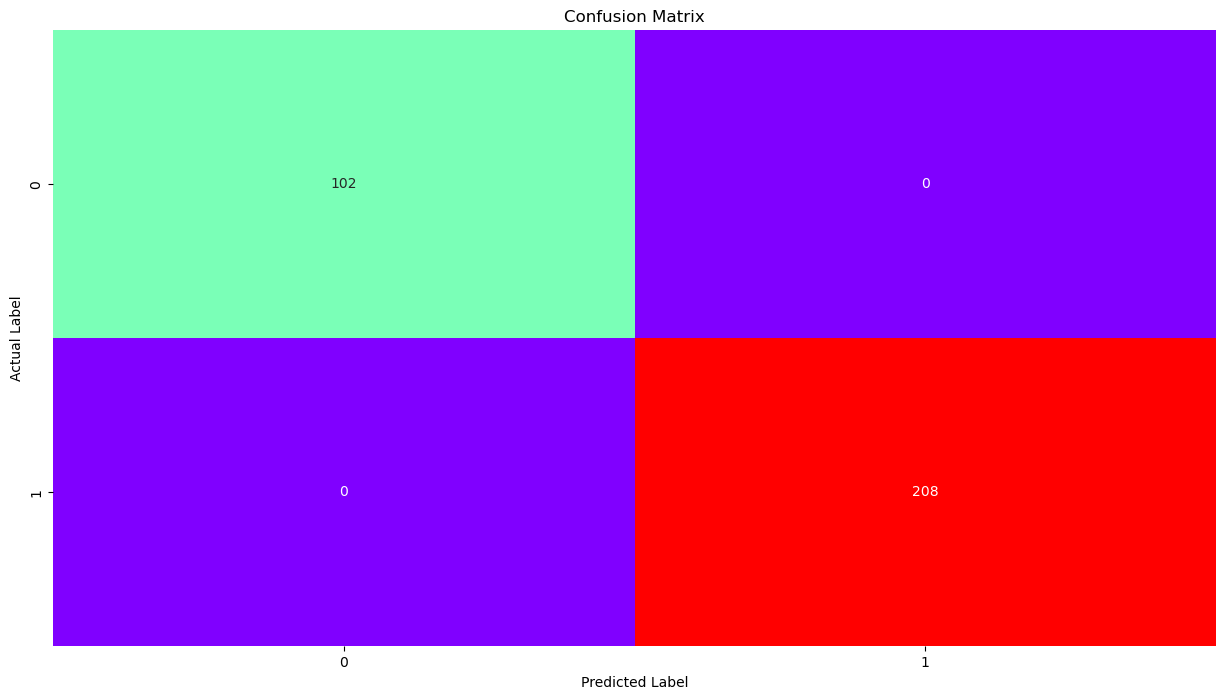

In [130]:
confusion_matrix(y_train_rf,ytrain_predict)
sns.heatmap(confusion_matrix(y_train_rf,ytrain_predict),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [131]:
print(classification_report(y_train_rf,ytrain_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       102
           1       1.00      1.00      1.00       208

    accuracy                           1.00       310
   macro avg       1.00      1.00      1.00       310
weighted avg       1.00      1.00      1.00       310



In [132]:
from sklearn.ensemble import BaggingClassifier

In [133]:
bgcl = BaggingClassifier(base_estimator=rfcl, n_estimators=100,random_state=1)
#bgcl = BaggingClassifier(n_estimators=50,random_state=1)

bgcl = bgcl.fit(X_train_rf, y_train_rf)

In [134]:
y_train_predict = bgcl.predict(X_train_rf)
model_score = bgcl.score(X_train_rf,y_train_rf)
print(model_score)
print(metrics.confusion_matrix(y_train_rf,y_train_predict))
print(metrics.classification_report(y_train_rf,y_train_predict))

0.9709677419354839
[[ 93   9]
 [  0 208]]
              precision    recall  f1-score   support

           0       1.00      0.91      0.95       102
           1       0.96      1.00      0.98       208

    accuracy                           0.97       310
   macro avg       0.98      0.96      0.97       310
weighted avg       0.97      0.97      0.97       310



In [135]:
y_test_predict = bgcl.predict(X_test_rf)
model_score = bgcl.score(X_test_rf,y_test_rf)
print(model_score)
print(metrics.confusion_matrix(y_test_rf,y_test_predict))
print(metrics.classification_report(y_test_rf,y_test_predict))

0.8059701492537313
[[26 16]
 [10 82]]
              precision    recall  f1-score   support

           0       0.72      0.62      0.67        42
           1       0.84      0.89      0.86        92

    accuracy                           0.81       134
   macro avg       0.78      0.76      0.76       134
weighted avg       0.80      0.81      0.80       134



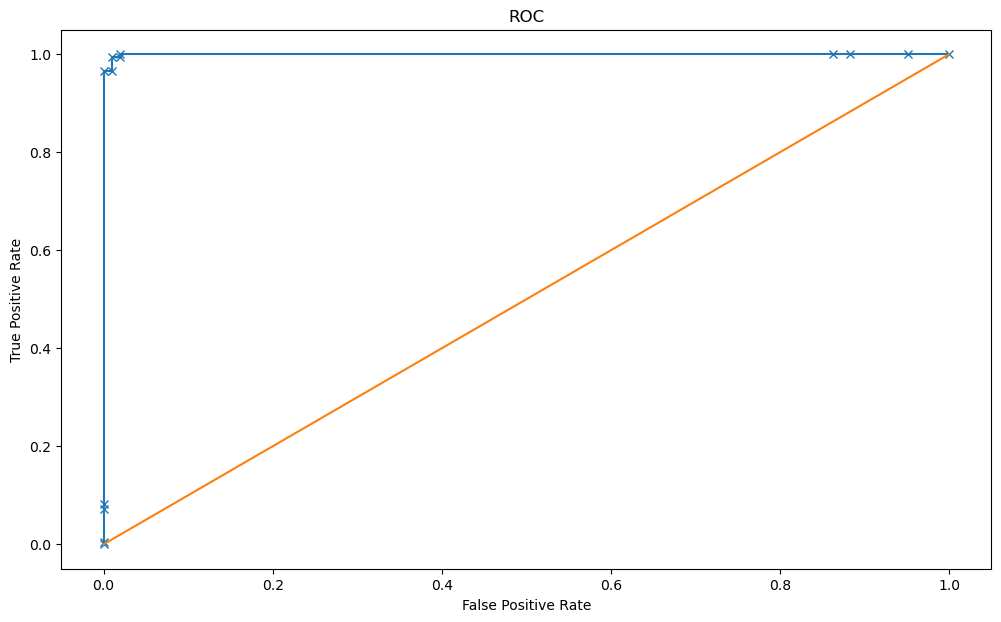

Area under Curve is 1.0


In [136]:
from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr, rf_tpr,_=roc_curve(y_train_rf,bgcl.predict_proba(X_train_rf)[:,1])
plt.figure(figsize=(12,7))
plt.plot(rf_fpr,rf_tpr, marker='x', label='Random Forest')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(y_train_rf,rfcl.predict_proba(X_train_rf)[:,1]))

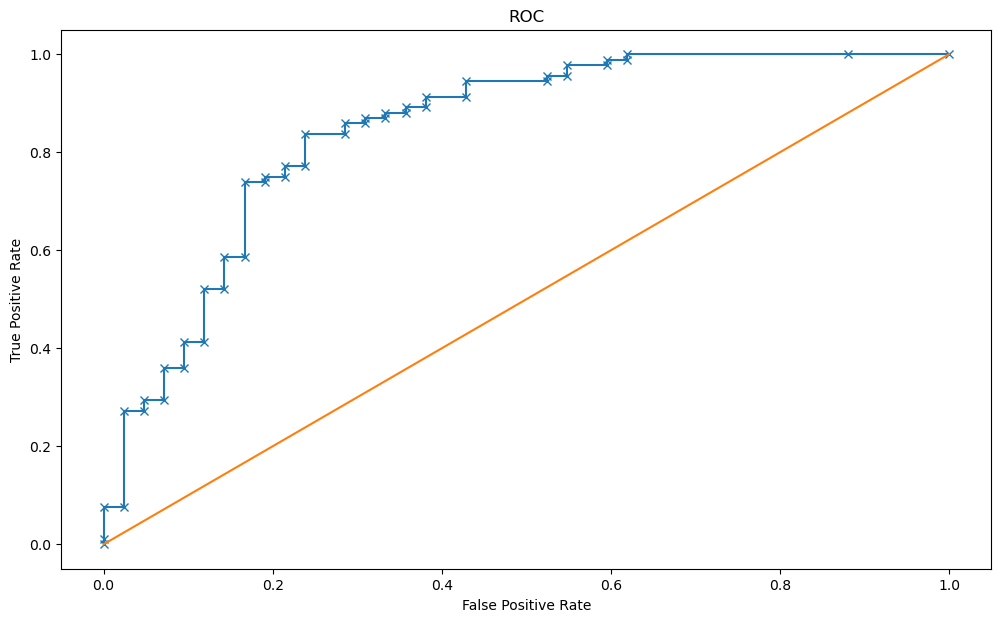

Area under Curve is 0.848731884057971


In [137]:
rf_fpr, rf_tpr,_=roc_curve(y_test_rf,bgcl.predict_proba(X_test_rf)[:,1])
plt.figure(figsize=(12,7))
plt.plot(rf_fpr,rf_tpr, marker='x', label='Random Forest')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(y_test_rf,rfcl.predict_proba(X_test_rf)[:,1]))

In [138]:
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'base_estimator__max_depth': [2, 4, 6, 8]
}

In [139]:
grid = GridSearchCV(estimator=bgcl, param_grid=param_grid, cv=5)

In [140]:
grid.fit(X_train_rf, y_train_rf)

GridSearchCV(cv=5,
             estimator=BaggingClassifier(base_estimator=RandomForestClassifier(max_features=6,
                                                                               random_state=1),
                                         n_estimators=100, random_state=1),
             param_grid={'base_estimator__max_depth': [2, 4, 6, 8],
                         'n_estimators': [10, 50, 100, 200]})

In [141]:
grid.best_params_

{'base_estimator__max_depth': 8, 'n_estimators': 200}

In [142]:
best_grid = grid.best_estimator_

In [143]:
best_grid

BaggingClassifier(base_estimator=RandomForestClassifier(max_depth=8,
                                                        max_features=6,
                                                        random_state=1),
                  n_estimators=200, random_state=1)

In [144]:
ytrain_predict = best_grid.predict(X_train_rf)
ytest_predict = best_grid.predict(X_test_rf)

In [145]:
confusion_matrix(y_train_rf,ytrain_predict)

array([[ 86,  16],
       [  0, 208]], dtype=int64)

In [146]:
print('Best score:', grid.best_score_)

Best score: 0.8516129032258064


In [147]:
print("Train Accuracy is : {}".format(accuracy_score(y_train_rf,ytrain_predict)))

print("\nTest Accuracy is : {}".format(accuracy_score(y_test_rf,ytest_predict)))


print("\nTrain ROC-AUC score is : {}".format(roc_auc_score(y_train_rf,grid.predict_proba(X_train_rf)[:,1])))
print("\nTest ROC-AUC score is : {}".format(roc_auc_score(y_test_rf,grid.predict_proba(X_test_rf)[:,1])))



print("\nConfusion matrix for train set : ","\n",confusion_matrix(y_train_rf,ytrain_predict))
print("\nConfusion matrix for test set : ","\n",confusion_matrix(y_test_log,ytest_predict))

Train Accuracy is : 0.9483870967741935

Test Accuracy is : 0.8134328358208955

Train ROC-AUC score is : 0.9972190799396681

Test ROC-AUC score is : 0.8403209109730849

Confusion matrix for train set :  
 [[ 86  16]
 [  0 208]]

Confusion matrix for test set :  
 [[26 16]
 [ 9 83]]


In [148]:
print('Classification report Train set :')
print(classification_report(y_train_rf,ytrain_predict))

Classification report Train set :
              precision    recall  f1-score   support

           0       1.00      0.84      0.91       102
           1       0.93      1.00      0.96       208

    accuracy                           0.95       310
   macro avg       0.96      0.92      0.94       310
weighted avg       0.95      0.95      0.95       310



In [149]:
print('Classification report Test set :')
print(classification_report(y_test_rf,ytest_predict))

Classification report Test set :
              precision    recall  f1-score   support

           0       0.74      0.62      0.68        42
           1       0.84      0.90      0.87        92

    accuracy                           0.81       134
   macro avg       0.79      0.76      0.77       134
weighted avg       0.81      0.81      0.81       134



Logistic Classifier: ROC AUC=0.840


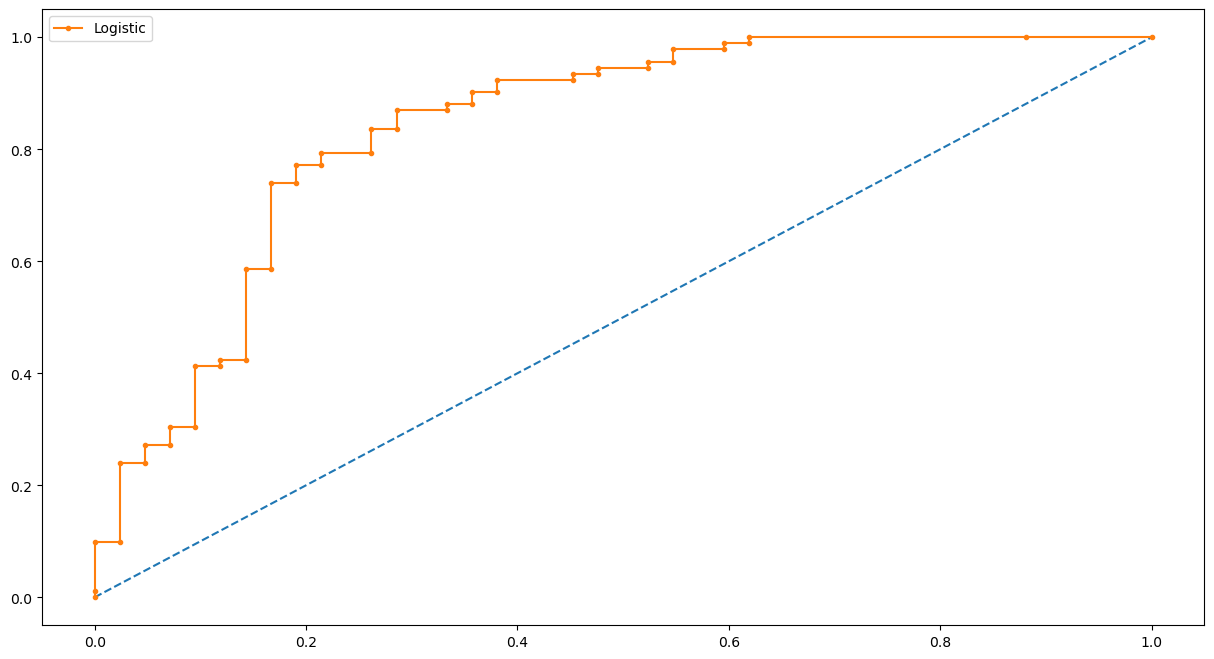

In [150]:
lr_probs = grid.predict_proba(X_test_rf)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
lr_auc = roc_auc_score(y_test_rf, lr_probs)
# summarize scores
print('Logistic Classifier: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_test_rf, lr_probs)
# plot the roc curve for the model
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')

# show the legend
plt.legend()
# show the plot
plt.show()

Logistic Classifier: ROC AUC=0.997


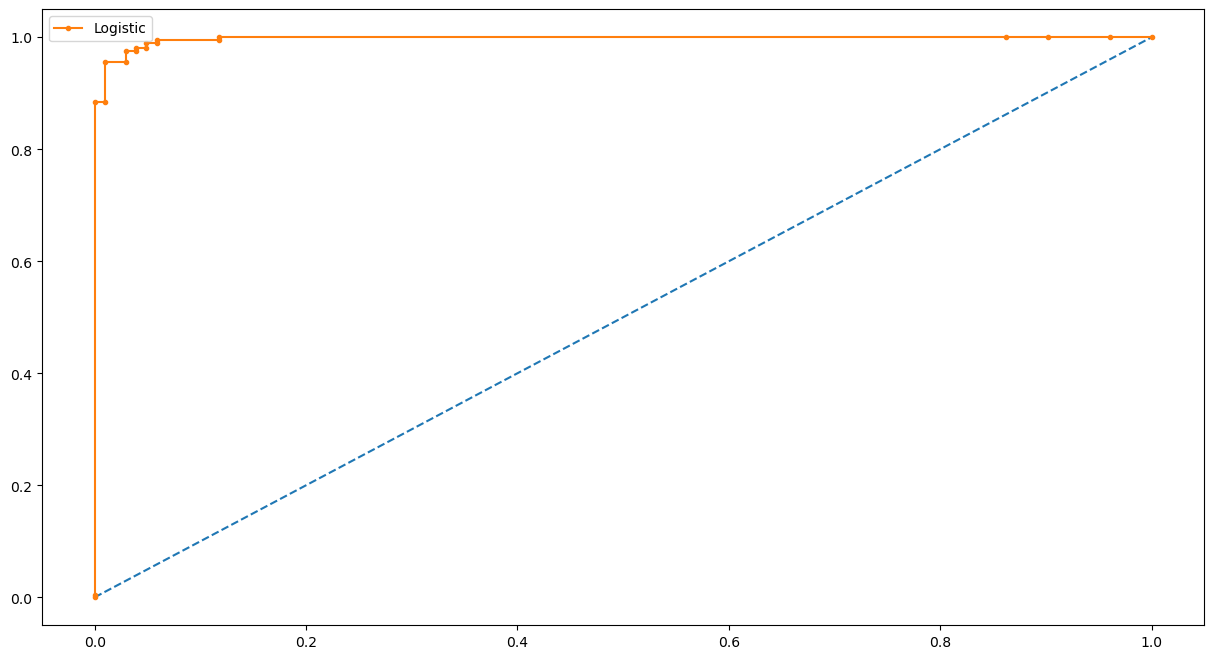

In [151]:
lr_probs = grid.predict_proba(X_train_rf)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
lr_auc = roc_auc_score(y_train_rf, lr_probs)
# summarize scores
print('Logistic Classifier: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_train_rf, lr_probs)
# plot the roc curve for the model
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')

# show the legend
plt.legend()
# show the plot
plt.show()

In [152]:
from sklearn.ensemble import AdaBoostClassifier

In [153]:
abcl = AdaBoostClassifier(n_estimators=10, random_state=1)

In [154]:
abcl = abcl.fit(X_train_rf, y_train_rf)

In [155]:
y_train_predict = abcl.predict(X_train_rf)
model_score = abcl.score(X_train_rf,y_train_rf)
print(model_score)
print(metrics.confusion_matrix(y_train_rf,y_train_predict))
print(metrics.classification_report(y_train_rf,y_train_predict))

0.8258064516129032
[[ 65  37]
 [ 17 191]]
              precision    recall  f1-score   support

           0       0.79      0.64      0.71       102
           1       0.84      0.92      0.88       208

    accuracy                           0.83       310
   macro avg       0.82      0.78      0.79       310
weighted avg       0.82      0.83      0.82       310



In [156]:
y_test_predict = abcl.predict(X_test_rf)
model_score = abcl.score(X_test_rf,y_test_rf)
print(model_score)
print(metrics.confusion_matrix(y_test_rf,y_test_predict))
print(metrics.classification_report(y_test_rf,y_test_predict))

0.8059701492537313
[[26 16]
 [10 82]]
              precision    recall  f1-score   support

           0       0.72      0.62      0.67        42
           1       0.84      0.89      0.86        92

    accuracy                           0.81       134
   macro avg       0.78      0.76      0.76       134
weighted avg       0.80      0.81      0.80       134



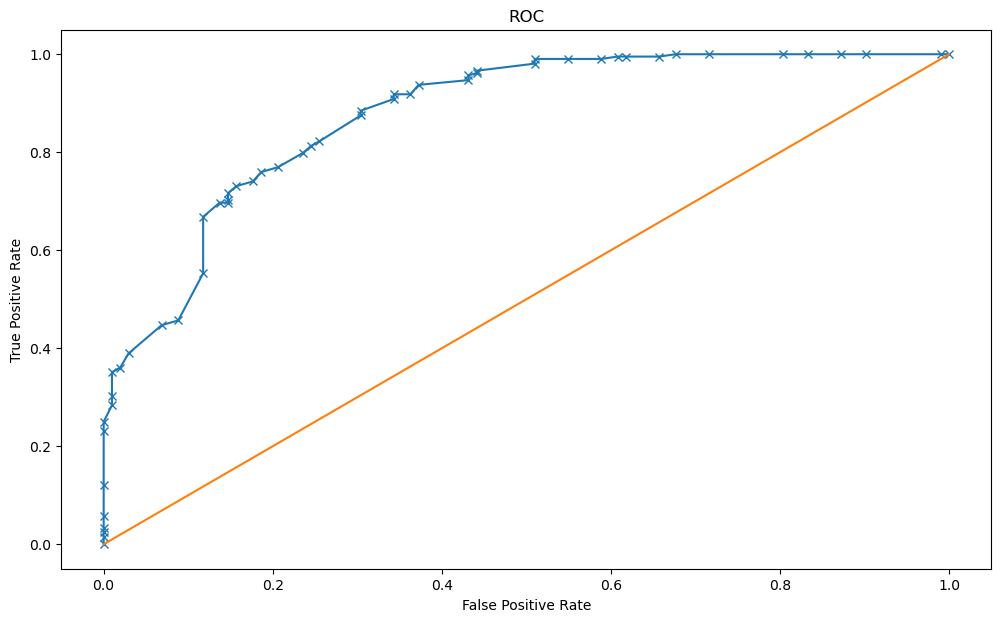

Area under Curve is 0.8774509803921569


In [157]:
rf_fpr, rf_tpr,_=roc_curve(y_train_rf,abcl.predict_proba(X_train_rf)[:,1])
plt.figure(figsize=(12,7))
plt.plot(rf_fpr,rf_tpr, marker='x', label='Random Forest')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(y_train_rf,abcl.predict_proba(X_train_rf)[:,1]))

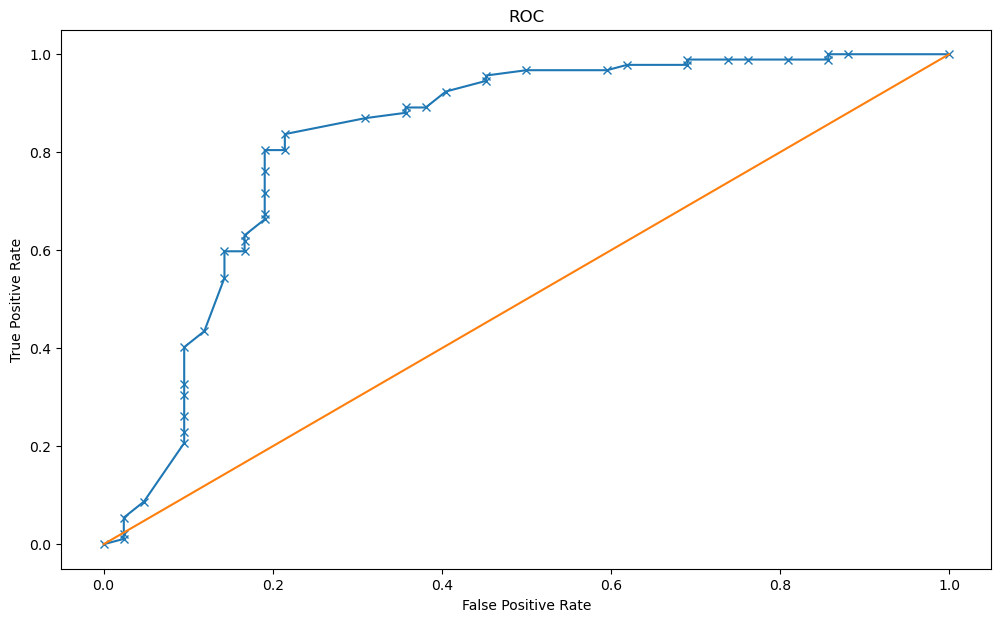

Area under Curve is 0.8281573498964804


In [158]:
rf_fpr, rf_tpr,_=roc_curve(y_test_rf,abcl.predict_proba(X_test_rf)[:,1])
plt.figure(figsize=(12,7))
plt.plot(rf_fpr,rf_tpr, marker='x', label='Random Forest')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(y_test_rf,abcl.predict_proba(X_test_rf)[:,1]))

In [159]:
base_estimator = RandomForestClassifier()

In [160]:
abcl = AdaBoostClassifier(base_estimator=base_estimator)

In [161]:
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'learning_rate': [0.1, 0.5, 1.0],
    'base_estimator__max_depth': [2, 4, 6, 8]
}

In [162]:
grid_boost = GridSearchCV(estimator=abcl, param_grid=param_grid, cv=5)

In [163]:
grid_boost.fit(X_train_rf, y_train_rf)

GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(base_estimator=RandomForestClassifier()),
             param_grid={'base_estimator__max_depth': [2, 4, 6, 8],
                         'learning_rate': [0.1, 0.5, 1.0],
                         'n_estimators': [10, 50, 100, 200]})

In [164]:
grid_boost.best_params_

{'base_estimator__max_depth': 8, 'learning_rate': 0.1, 'n_estimators': 100}

In [173]:
best_grid = grid_boost.best_estimator_
best_grid

AdaBoostClassifier(base_estimator=RandomForestClassifier(max_depth=8),
                   learning_rate=0.1, n_estimators=100)

In [174]:
ytrain_predict_boost = best_grid.predict(X_train_rf)
ytest_predict_boost = best_grid.predict(X_test_rf)

In [175]:
confusion_matrix(y_train_rf,ytrain_predict_boost)

array([[ 99,   3],
       [  0, 208]], dtype=int64)

In [176]:
print("Train Accuracy is : {}".format(accuracy_score(y_train_rf,ytrain_predict_boost)))

print("\nTest Accuracy is : {}".format(accuracy_score(y_test_rf,ytest_predict_boost)))


print("\nTrain ROC-AUC score is : {}".format(roc_auc_score(y_train_rf,grid_boost.predict_proba(X_train_rf)[:,1])))
print("\nTest ROC-AUC score is : {}".format(roc_auc_score(y_test_rf,grid_boost.predict_proba(X_test_rf)[:,1])))



print("\nConfusion matrix for train set : ","\n",confusion_matrix(y_train_rf,ytrain_predict_boost))
print("\nConfusion matrix for test set : ","\n",confusion_matrix(y_test_log,ytest_predict_boost))

Train Accuracy is : 0.9903225806451613

Test Accuracy is : 0.8134328358208955

Train ROC-AUC score is : 1.0

Test ROC-AUC score is : 0.8317805383022774

Confusion matrix for train set :  
 [[ 99   3]
 [  0 208]]

Confusion matrix for test set :  
 [[25 17]
 [ 8 84]]


In [177]:
print('Classification report Train set :')
print(classification_report(y_train_rf,ytrain_predict_boost))

Classification report Train set :
              precision    recall  f1-score   support

           0       1.00      0.97      0.99       102
           1       0.99      1.00      0.99       208

    accuracy                           0.99       310
   macro avg       0.99      0.99      0.99       310
weighted avg       0.99      0.99      0.99       310



In [178]:
print('Classification report Test set :')
print(classification_report(y_test_rf,ytest_predict_boost))

Classification report Test set :
              precision    recall  f1-score   support

           0       0.76      0.60      0.67        42
           1       0.83      0.91      0.87        92

    accuracy                           0.81       134
   macro avg       0.79      0.75      0.77       134
weighted avg       0.81      0.81      0.81       134



Logistic Classifier: ROC AUC=0.832


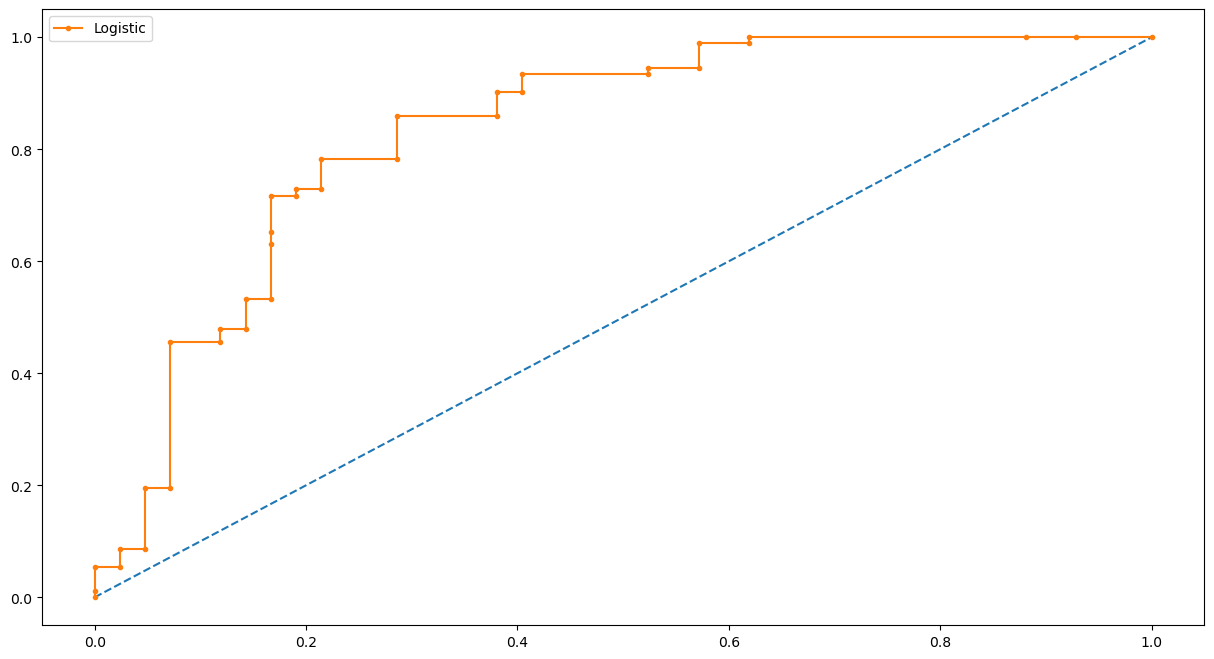

In [179]:
lr_probs = grid_boost.predict_proba(X_test_rf)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
lr_auc = roc_auc_score(y_test_rf, lr_probs)
# summarize scores
print('Logistic Classifier: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_test_rf, lr_probs)
# plot the roc curve for the model
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')

# show the legend
plt.legend()
# show the plot
plt.show()

Logistic Classifier: ROC AUC=1.000


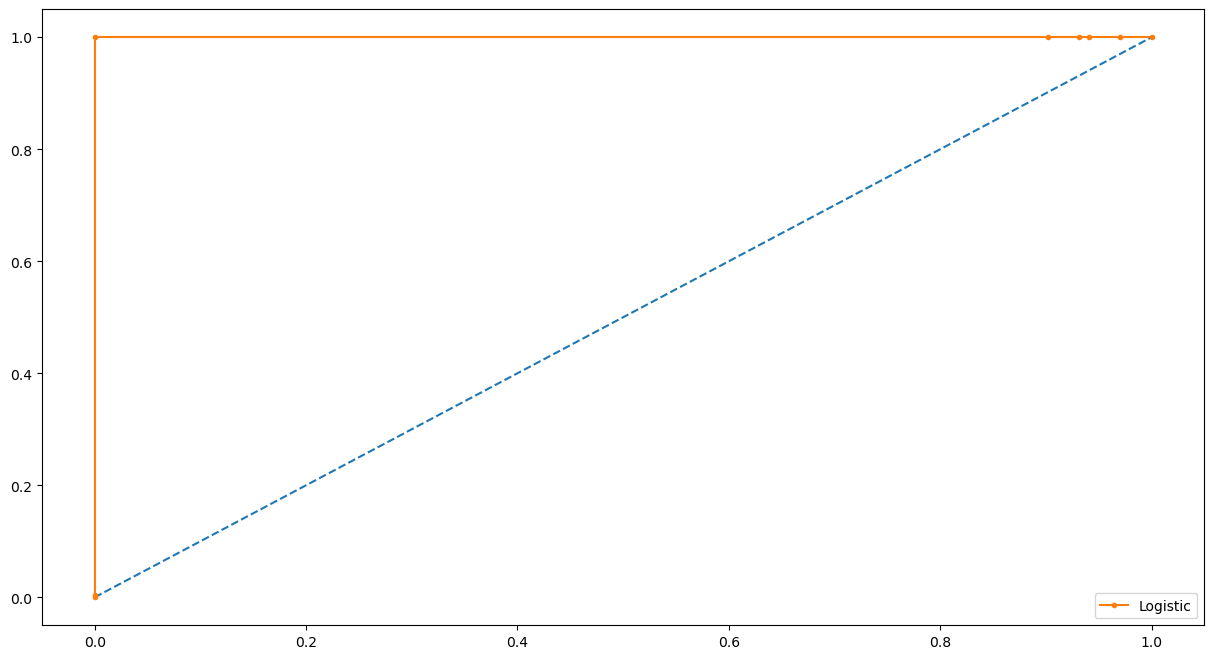

In [180]:
lr_probs = grid_boost.predict_proba(X_train_rf)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
lr_auc = roc_auc_score(y_train_rf, lr_probs)
# summarize scores
print('Logistic Classifier: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_train_rf, lr_probs)
# plot the roc curve for the model
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')

# show the legend
plt.legend()
# show the plot
plt.show()